In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import joblib

In [2]:
# read fold for check
f1 = pd.read_csv("../kitt/DATA_progress3_new/f1.csv")
f2 = pd.read_csv("../kitt/DATA_progress3_new/f2.csv")
f3 = pd.read_csv("../kitt/DATA_progress3_new/f3.csv")
f4 = pd.read_csv("../kitt/DATA_progress3_new/f4.csv")
f5 = pd.read_csv("../kitt/DATA_progress3_new/f5.csv")

# read raw data
raw_data = pd.read_csv("../raw_data/data.csv")

# Review

In [3]:
# run it once
raw_data = raw_data.drop(labels='Unnamed: 32', axis=1)
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
print("########## the fold ############")
print("fold1: "+ str(len(f1)))
print("fold2: "+ str(len(f2)))
print("fold3: "+ str(len(f3)))
print("fold4: "+ str(len(f4)))
print("fold5: "+ str(len(f5)))
print("\ntotal: " + str(len(f1) + len(f2) + len(f3) + len(f4) + len(f5)))
print("################################")

########## the fold ############
fold1: 91
fold2: 91
fold3: 91
fold4: 91
fold5: 91

total: 455
################################


In [5]:
y_f1 = f1[f1.columns[1]]
le = LabelEncoder()
y_f1 = np.array(le.fit_transform(y_f1))
print("y_f1:", le.classes_)
y_f2 = f2[f2.columns[1]]
le = LabelEncoder()
y_f2 = np.array(le.fit_transform(y_f2))
print("y_f2:",le.classes_)
y_f3 = f3[f3.columns[1]]
le = LabelEncoder()
y_f3 = np.array(le.fit_transform(y_f3))
print("y_f3:",le.classes_)
y_f4 = f4[f4.columns[1]]
le = LabelEncoder()
y_f4 = np.array(le.fit_transform(y_f4))
print("y_f4:",le.classes_)
y_f5 = f5[f5.columns[1]]
le = LabelEncoder()
y_f5 = np.array(le.fit_transform(y_f5))
print("y_f5:",le.classes_)

y_f1: ['B' 'M']
y_f2: ['B' 'M']
y_f3: ['B' 'M']
y_f4: ['B' 'M']
y_f5: ['B' 'M']


In [6]:
# check balance in each fold
print("------ fold ------")
print("f1 positive: " + str(sum(y_f1)))
print("f1 negative: " + str(len(f1) - sum(y_f1)))
print("------------------")
print("f2 positive: " + str(sum(y_f2)))
print("f2 negative: " + str(len(f2) - sum(y_f2)))
print("------------------")
print("f3 positive: " + str(sum(y_f3)))
print("f3 negative: " + str(len(f3) - sum(y_f3)))
print("------------------")
print("f4 positive: " + str(sum(y_f4)))
print("f4 negative: " + str(len(f4) - sum(y_f4)))
print("------------------")
print("f5 positive: " + str(sum(y_f5)))
print("f5 negative: " + str(len(f5) - sum(y_f5)))
print("------------------")

------ fold ------
f1 positive: 34
f1 negative: 57
------------------
f2 positive: 34
f2 negative: 57
------------------
f3 positive: 34
f3 negative: 57
------------------
f4 positive: 34
f4 negative: 57
------------------
f5 positive: 34
f5 negative: 57
------------------


# Function

In [521]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1


In [522]:
def cal_score_all(cm_val):
    sen_val = sensitivity(cm_val)
    spec_val = specificity(cm_val)
    acc_val = accuracy(cm_val)
    pre_val = precision(cm_val)
    f1_score_val = f1(cm_val)
def plot_cm(cm_val, save=False, title="-", split="-"):
    class_names = ['benign','malignant']
    # Normalize confusion matrix to percentage
    cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
    # Create plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
    ax.grid(False)
    # Add labels
    ax.set(xticks=np.arange(cm_norm_val.shape[1]),
           yticks=np.arange(cm_norm_val.shape[0]),
           xticklabels=class_names, yticklabels=class_names)
    ax.set_title(title+" {}".format(split), fontsize=16)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)
    # Add percentage and count values inside plot
    thresh = cm_norm_val.max() / 2.
    for i in range(cm_norm_val.shape[0]):
        for j in range(cm_norm_val.shape[1]):
            ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                    ha="center", va="center",
                    color="white" if cm_norm_val[i, j] > thresh else "black",
                   fontsize=20)
    if save is not False:
        save_path = '{}_{}.png'.format(save, split)
        plt.savefig(save_path)
        print("Save fig at {}".format(save_path))
    plt.show()
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')  
def thresholding(y_val, y_pred_val):
    fpr, tpr, thresholds = metrics.roc_curve(y_val,  y_pred_val[:, 1])
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    print('FPR: %.4f\nTPR: %.4f' %(fpr[ix], tpr[ix]))
    y_pred_val_new = to_labels(y_pred_val[:, 1], best_thresh)
    return y_pred_val_new
def plot_ROC():
    fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
    auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
    fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
    auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
    gmeans2 = np.sqrt(tpr2 * (1-fpr2))
    ix2 = np.argmax(gmeans2)
    print("---------------------------------------")
    print("AUC validate: %.4f" % auc1)
    print("AUC test: %.4f" % auc2)
    plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
    plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
    plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    plt.legend(loc=4)
    plt.show()
def predict_set(split,param):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    loaded_model = joblib.load('RF_model/RF_param{}_{}.joblib'.format(param,split))
    y_pred_val_raw = loaded_model.predict_proba(x_val)
    y_pred_val = thresholding(y_val, y_pred_val_raw)
    return y_val, y_pred_val, y_pred_val_raw
def ROC_split(param):
    split = "split1"
    y_val, y_pred_val, y_pred_val_raw = predict_set(split,param)
    fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val_raw[:,1])
    auc1 = metrics.roc_auc_score(y_val,  y_pred_val_raw[:,1])*100
    
    split = "split2"
    y_val, y_pred_val, y_pred_val_raw = predict_set(split,param)
    fpr2, tpr2, thr2 = metrics.roc_curve(y_val,  y_pred_val_raw[:,1])
    auc2 = metrics.roc_auc_score(y_val,  y_pred_val_raw[:,1])*100
    
    split = "split3"
    y_val, y_pred_val, y_pred_val_raw = predict_set(split,param)
    fpr3, tpr3, thr3 = metrics.roc_curve(y_val,  y_pred_val_raw[:,1])
    auc3 = metrics.roc_auc_score(y_val,  y_pred_val_raw[:,1])*100
    
    split = "split4"
    y_val, y_pred_val, y_pred_val_raw = predict_set(split,param)
    fpr4, tpr4, thr4 = metrics.roc_curve(y_val,  y_pred_val_raw[:,1])
    auc4 = metrics.roc_auc_score(y_val,  y_pred_val_raw[:,1])*100
    
    split = "split5"
    y_val, y_pred_val, y_pred_val_raw = predict_set(split,param)
    fpr5, tpr5, thr5 = metrics.roc_curve(y_val,  y_pred_val_raw[:,1])
    auc5 = metrics.roc_auc_score(y_val,  y_pred_val_raw[:,1])*100
    
    # gmeans2 = np.sqrt(tpr2 * (1-fpr2))
    # ix2 = np.argmax(gmeans2)
    print("---------------------------------------")
    print("AUC split1: %.2f%%" % auc1)
    print("AUC split2: %.2f%%" % auc2)
    print("AUC split3: %.2f%%" % auc3)
    print("AUC split4: %.2f%%" % auc4)
    print("AUC split5: %.2f%%" % auc5)
    
    plt.plot(fpr1,tpr1,label="ROC split 1, auc="+str("%.2f%%" % auc1))
    plt.plot(fpr2,tpr2,label="ROC split 2, auc="+str("%.2f%%" % auc2))
    plt.plot(fpr2,tpr2,label="ROC split 3, auc="+str("%.2f%%" % auc3))
    plt.plot(fpr2,tpr2,label="ROC split 4, auc="+str("%.2f%%" % auc4))
    plt.plot(fpr2,tpr2,label="ROC split 5, auc="+str("%.2f%%" % auc5))
    plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    plt.legend(loc=4)
    plt.show()
def evaluate(param,split):
    loaded_model = joblib.load("../DTC/models_progress3/param{}/dtc_{}.joblib".format(param, split))
    print("############## validate set ################")
    y_pred_val_raw = loaded_model.predict_proba(x_val)
    # print(y_pred_val_raw[:])
    y_pred_val = thresholding(y_val, y_pred_val_raw)
    # print(y_pred_val[:])
    # print(y_val[:])
    false = false_predict(y_val,y_pred_val)
    print(false[:])
    
    # Confusion matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    print('Confusion Matrix')
    print('-'*16)
    print(cm_val,'\n')
    print('-'*16)

    # Calculate score
    print(split)
    cal_score_all(cm_val)
    
    # plot confusion matrix
    plot_cm(cm_val, title="Validate", split=split)
    
    # ################# test set ##################
    label = ['benign','malignant']
    print("################# test set ##################")
    y_pred_test_raw = loaded_model.predict_proba(x_test)
    y_pred_test = thresholding(y_test, y_pred_test_raw)

    # Confusion matrix
    cm_test = confusion_matrix(y_test, y_pred_test)
    print('Confusion Matrix')
    print('-'*16)
    print(cm_test,'\n')
    print('-'*16)

    # Calculate score
    print(split)
    cal_score_all(cm_test)

    # plot confusion matrix
    plot_cm(cm_test, title="Test", split=split)
    ################## plot ROC curve ########################
    fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val_raw[:,1])
    auc1 = metrics.roc_auc_score(y_val,  y_pred_val_raw[:,1])*100
    fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test_raw[:,1])
    auc2 = metrics.roc_auc_score(y_test,  y_pred_test_raw[:,1])*100
    gmeans2 = np.sqrt(tpr2 * (1-fpr2))
    ix2 = np.argmax(gmeans2)
    print("---------------------------------------")
    print("AUC validate: %.2f%%" % auc1)
    print("AUC test: %.2f%%" % auc2)
    plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.2f%%" % auc1))
    plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.2f%%" % auc2))
    plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    plt.legend(loc=4)
    plt.show()
    feature_impotance(split)
    return cm_val,cm_test,auc1,auc2
def setup(split):
    # setting split and path
    path = "../kitt/DATA_progress3_new/"
    train_path = "{}/{}/train/train_oversampling.csv".format(path,split)
    test_path =  "{}/test.csv".format(path)
    valid_path = "{}/{}/val/val.csv".format(path,split)

    print(train_path)
    # Load the train set
    train_data = pd.read_csv(train_path)
    print(train_data.shape)
    x_train = train_data[train_data.columns[2:]]
    print(x_train.shape)
    y_train = train_data[train_data.columns[1]]
    le = LabelEncoder()
    y_train = np.array(le.fit_transform(y_train))
    print(le.classes_)
    print(test_path)
    # Load the test set
    test_data = pd.read_csv(test_path)
    print(test_data.shape)
    x_test = test_data[test_data.columns[2:]]
    print(x_test.shape)
    y_test = test_data[test_data.columns[1]]
    le = LabelEncoder()
    y_test = np.array(le.fit_transform(y_test))
    print(le.classes_)

    print(valid_path)
    # Load the validation set
    val_data = pd.read_csv(valid_path)
    print(val_data.shape)
    x_val = val_data[val_data.columns[2:]]
    print(x_val.shape)
    y_val = val_data[val_data.columns[1]]
    le = LabelEncoder()
    y_val = np.array(le.fit_transform(y_val))
    print(le.classes_)

    # StandardScaler
    sc = StandardScaler()
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    x_val = x_val.to_numpy()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    x_val = sc.transform(x_val)
    
    return x_train,y_train,x_test,y_test,x_val,y_val
def feature_impotance(split):
    loaded_model = joblib.load("../DTC/models_progress3/dtc_{}.joblib".format(split))
    path = "../kitt/DATA_progress3/"
    train_path = "{}/{}/train/train_oversampling.csv".format(path,split)
    train_data = pd.read_csv(train_path)
    x_train = train_data[train_data.columns[2:]]
    # get the best random forest model
    best_rfc = loaded_model.best_estimator_
    # get the feature importances of the best random forest model
    importances = best_rfc.feature_importances_
    df = pd.DataFrame({'Variable':x_train.columns,
              'Importance':importances}).sort_values('Importance', ascending=False)
    print(df)


In [523]:
def Mean_SD(name,split1, split2, split3, split4, split5):
    sensitivity_values = []
    sensitivity_values.append(split1)
    sensitivity_values.append(split2)
    sensitivity_values.append(split3)
    sensitivity_values.append(split4)
    sensitivity_values.append(split5)

    # calculating the mean of sample set
    mean_sensitivity = statistics.mean(sensitivity_values)
    # Calculate standard deviation of sensitivity
    sensitivity_sd = statistics.stdev(sensitivity_values)
    
    # Print mean sensitivity with standard deviation
    print("%s: %.2f ± %.2f%%" % (name,mean_sensitivity, sensitivity_sd))

In [524]:
def plot(split1_cm, split2_cm, split3_cm, split4_cm, split5_cm):
    cm_val = split1_cm + split2_cm + split3_cm + split4_cm + split5_cm
    # Calculate score
    print("split1")
    sen_val_1 = sensitivity(split1_cm)
    spec_val_1 = specificity(split1_cm)
    acc_val_1 = accuracy(split1_cm)
    pre_val_1 = precision(split1_cm)
    f1_score_val_1 = f1(split1_cm)
    print("\nsplit2")
    sen_val_2 = sensitivity(split2_cm)
    spec_val_2 = specificity(split2_cm)
    acc_val_2 = accuracy(split2_cm)
    pre_val_2 = precision(split2_cm)
    f1_score_val_2 = f1(split2_cm)
    print("\nsplit3")
    sen_val_3 = sensitivity(split3_cm)
    spec_val_3 = specificity(split3_cm)
    acc_val_3 = accuracy(split3_cm)
    pre_val_3 = precision(split3_cm)
    f1_score_val_3 = f1(split3_cm)
    print("\nsplit4")
    sen_val_4 = sensitivity(split4_cm)
    spec_val_4 = specificity(split4_cm)
    acc_val_4 = accuracy(split4_cm)
    pre_val_4 = precision(split4_cm)
    f1_score_val_4 = f1(split4_cm)
    print("\nsplit5")
    sen_val_5 = sensitivity(split5_cm)
    spec_val_5 = specificity(split5_cm)
    acc_val_5 = accuracy(split5_cm)
    pre_val_5 = precision(split5_cm)
    f1_score_val_5 = f1(split5_cm)
    print("\noverall")
    Mean_SD("sensitivity",sen_val_1, sen_val_2, sen_val_3, sen_val_4, sen_val_5)
    Mean_SD("specificity",spec_val_1, spec_val_2, spec_val_3, spec_val_4, spec_val_5)
    Mean_SD("accuracy",acc_val_1, acc_val_2, acc_val_3, acc_val_4, acc_val_5)
    Mean_SD("precision",pre_val_1, pre_val_2, pre_val_3, pre_val_4, pre_val_5)
    Mean_SD("f1_score",f1_score_val_1, f1_score_val_2, f1_score_val_3, f1_score_val_4, f1_score_val_5)
    # plot confusion matrix
    class_names = ['benign','malignant']
    # Normalize confusion matrix to percentage
    cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
    # Create plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
    ax.grid(False)
    # Add labels
    ax.set(xticks=np.arange(cm_norm_val.shape[1]),
           yticks=np.arange(cm_norm_val.shape[0]),
           xticklabels=class_names, yticklabels=class_names)
    ax.set_title("Validate set", fontsize=16)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)
    # Add percentage and count values inside plot
    thresh = cm_norm_val.max() / 2.
    for i in range(cm_norm_val.shape[0]):
        for j in range(cm_norm_val.shape[1]):
            ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                    ha="center", va="center",
                    color="white" if cm_norm_val[i, j] > thresh else "black", fontsize=20)
    # plt.savefig('rf_model/validate_cm_{}.png'.format(split))
    # plt.savefig('rf_model/validate_cm_best_param2_{}.png'.format(split))
    plt.show()

In [535]:
def false_predict(y_true, y_pred):
    """
    Compares two arrays and returns the indices of false predictions.
    Args:
        y_true: true labels
        y_pred: predicted labels
    Returns:
        The indices of false predictions.
    """
    path = "../kitt/DATA_progress3/"
    test_path =  "{}/test.csv".format(path)
    test_data = pd.read_csv(test_path)
    false_indices = []
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i]:
            false_indices.append(i)
    print(test_data.loc[false_indices])
    return false_indices

# Grid Search

In [34]:
def DTC_GridSearch(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
    }
    
    # Define grid search object
    cv_dtc = GridSearchCV(DecisionTreeClassifier(), parameters, verbose = 1)

    cv_dtc.fit(x_train, y_train)

    # save the model
    path = "models_progress3/dtc_parameter_{}.txt".format(split)
    with open(path, 'w') as f:
        f.write(str(cv_dtc.best_params_)+"\n")
        f.write(str(cv_dtc.best_score_))
        print("save parameter at {}".format(path))
    joblib.dump(cv_dtc, 'models_progress3/dtc_{}.joblib'.format(split))

In [35]:
DTC_GridSearch("split1")
DTC_GridSearch("split2")
DTC_GridSearch("split3")
DTC_GridSearch("split4")
DTC_GridSearch("split5")

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
save parameter at models_progress3/dtc_parameter_split1.txt
../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
save parameter at models_progress3/dtc_parameter_split2.txt
../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Fitting 5 folds for each of 8640 candida

# Set up all split

In [525]:
def dtc_train_param1(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    dtc = DecisionTreeClassifier(criterion="entropy",
                             max_depth=15, min_samples_leaf=1, 
                             min_samples_split=3, splitter="random")
    dtc.fit(x_train, y_train)
    joblib.dump(dtc, "../DTC/models_progress3/param1/dtc_{}.joblib".format(split))

In [526]:
def dtc_train_param2(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    dtc = DecisionTreeClassifier(criterion="gini",
                             max_depth=25, min_samples_leaf=1, 
                             min_samples_split=2, splitter="random")
    dtc.fit(x_train, y_train)
    joblib.dump(dtc, "../DTC/models_progress3/param2/dtc_{}.joblib".format(split))

In [527]:
def dtc_train_param3(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    dtc = DecisionTreeClassifier(criterion="entropy",
                             max_depth=12, min_samples_leaf=1, 
                             min_samples_split=2, splitter="random")
    dtc.fit(x_train, y_train)
    joblib.dump(dtc, "../DTC/models_progress3/param3/dtc_{}.joblib".format(split))

In [528]:
def dtc_train_param4(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    dtc = DecisionTreeClassifier(criterion="gini",
                             max_depth=15, min_samples_leaf=1, 
                             min_samples_split=2, splitter="best")
    dtc.fit(x_train, y_train)
    joblib.dump(dtc, "../DTC/models_progress3/param4/dtc_{}.joblib".format(split))

In [529]:
def dtc_train_param5(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    dtc = DecisionTreeClassifier(criterion="gini",
                             max_depth=30, min_samples_leaf=1, 
                             min_samples_split=3, splitter="random")
    dtc.fit(x_train, y_train)
    joblib.dump(dtc, "../DTC/models_progress3/param5/dtc_{}.joblib".format(split))

# PARAMETER 1

## Param1 Split1

In [1480]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [1515]:
dtc_train_param1(split)

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 0.9412
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
8    923465         B         24.21      361.6          0.08192   
45  8711002         B         15.34      538.9          0.09384   
79   867739         M         21.91     1075.0          0.09430   
81   846381         M         23.95      782.7          0.08401   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
8          0.01548         0.1976                 0.06328      1.9180   
45         0.09293         0.1822                 0.06207      0.7927   
79         0.11530         0.1692                 0.05727      1.2020   
81         0.09938         0.1847                 0.05338      1.0780   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
8     33.00       0.008263       0.01277      0.02466              0.002977   
45    22.79       0.008584       0.03047      0

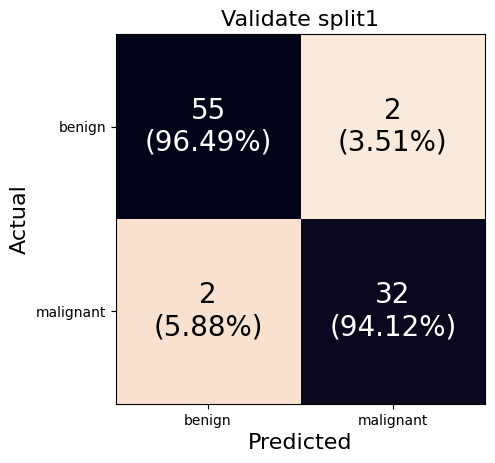

################# test set ##################
Best Threshold=1.000000
FPR: 0.1250
TPR: 0.9048
Confusion Matrix
----------------
[[63  9]
 [ 4 38]] 

----------------
split1
Sensitivity: 90.48%
Specificity: 87.50%
Accuracy: 88.60%
Precision: 80.85%
Sensitivity: 90.48%
Precision: 80.85%
F1: 85.39%


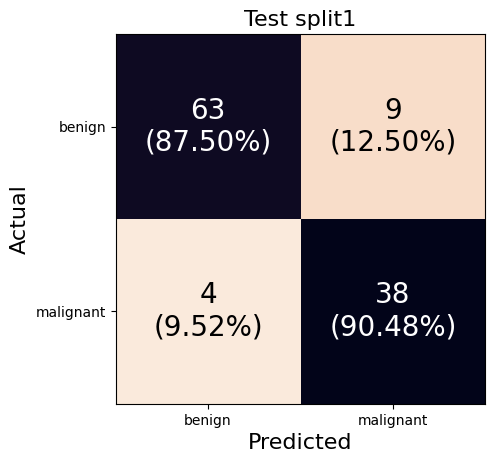

---------------------------------------
AUC validate: 95.30%
AUC test: 88.99%


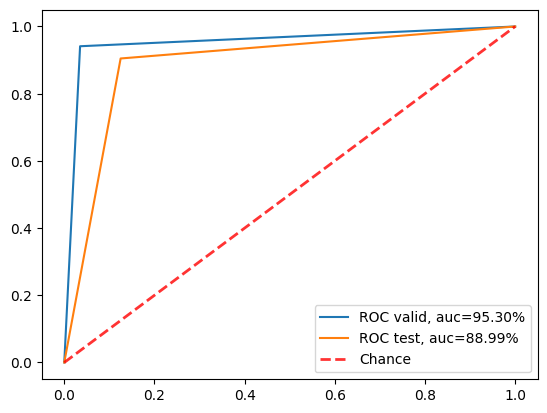

                   Variable  Importance
13          concavity_worst    0.407808
7                   area_se    0.181984
1                 area_mean    0.122967
2           smoothness_mean    0.085647
5    fractal_dimension_mean    0.062824
3            concavity_mean    0.046534
0              texture_mean    0.033663
10              symmetry_se    0.014348
9              concavity_se    0.014274
6                texture_se    0.014233
14           symmetry_worst    0.009042
8             smoothness_se    0.006678
4             symmetry_mean    0.000000
11     fractal_dimension_se    0.000000
12         smoothness_worst    0.000000
15  fractal_dimension_worst    0.000000


In [1516]:
param = 1
param1_split1_cm_val, param1_split1_cm_test, param1_split1_AUC_val, param1_split1_AUC_test = evaluate(param,split)

## Param1 Split2

In [368]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [406]:
dtc_train_param1(split)

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 1.0000
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
11  868871         B         13.39      384.8          0.11640   
29   87127         B          9.71      357.6          0.09594   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
11         0.04635         0.1771                 0.06072      1.3430   
29         0.02531         0.1381                 0.06400      0.4064   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
11    26.33       0.011270       0.02187      0.01580              0.003442   
29    11.48       0.007809       0.01099      0.01254              0.002120   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
11            0.1367          0.08669          0.2102                  0.06784  
29            0.1436          0.10470          0.2090                  0.07699  
[11, 29

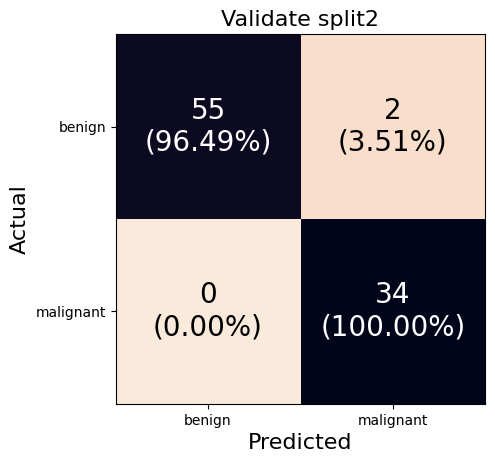

################# test set ##################
Best Threshold=1.000000
FPR: 0.0556
TPR: 0.8333
Confusion Matrix
----------------
[[68  4]
 [ 7 35]] 

----------------
split2
Sensitivity: 83.33%
Specificity: 94.44%
Accuracy: 90.35%
Precision: 89.74%
Sensitivity: 83.33%
Precision: 89.74%
F1: 86.42%


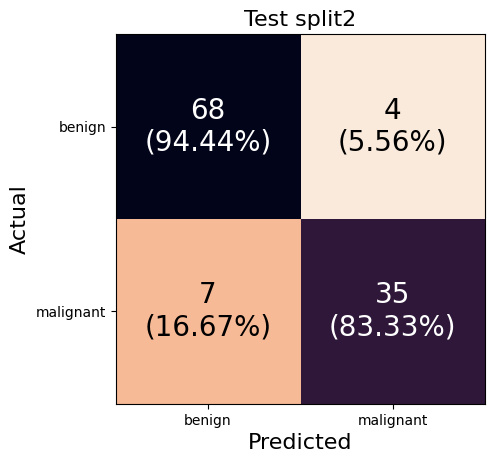

---------------------------------------
AUC validate: 98.25%
AUC test: 88.89%


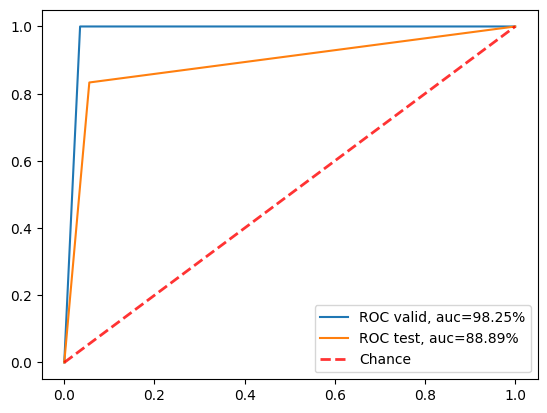

                   Variable  Importance
7                   area_se    0.522191
13          concavity_worst    0.228925
1                 area_mean    0.047891
0              texture_mean    0.039836
5    fractal_dimension_mean    0.035364
9              concavity_se    0.034290
6                texture_se    0.029537
15  fractal_dimension_worst    0.019558
3            concavity_mean    0.011751
8             smoothness_se    0.009357
11     fractal_dimension_se    0.008254
4             symmetry_mean    0.007479
14           symmetry_worst    0.005263
12         smoothness_worst    0.000304
2           smoothness_mean    0.000000
10              symmetry_se    0.000000


In [407]:
param = 1
param1_split2_cm_val, param1_split2_cm_test, param1_split2_AUC_val, param1_split2_AUC_test = evaluate(param,split)

## Param1 Split3

In [2701]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [2786]:
dtc_train_param1(split)

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9706
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
9   917897         B         15.68      293.2          0.09492   
25  857373         B         16.34      571.8          0.07685   
28  903011         B         15.50      392.0          0.08365   
87  925622         M         30.62      716.9          0.10480   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
9          0.02330         0.1387                 0.06891      1.2160   
25         0.01857         0.1353                 0.05953      0.9234   
28         0.10070         0.1810                 0.07252      1.0670   
87         0.25500         0.2128                 0.07152      1.2050   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
9     15.24       0.008732       0.01062      0.01824              0.003494   
25    14.55       0.004477       0.01079      0.0132

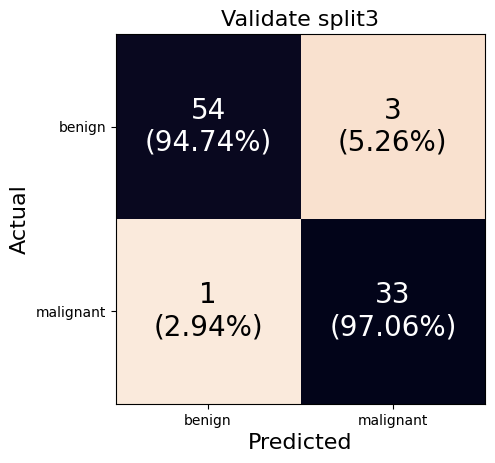

################# test set ##################
Best Threshold=1.000000
FPR: 0.0833
TPR: 0.8571
Confusion Matrix
----------------
[[66  6]
 [ 6 36]] 

----------------
split3
Sensitivity: 85.71%
Specificity: 91.67%
Accuracy: 89.47%
Precision: 85.71%
Sensitivity: 85.71%
Precision: 85.71%
F1: 85.71%


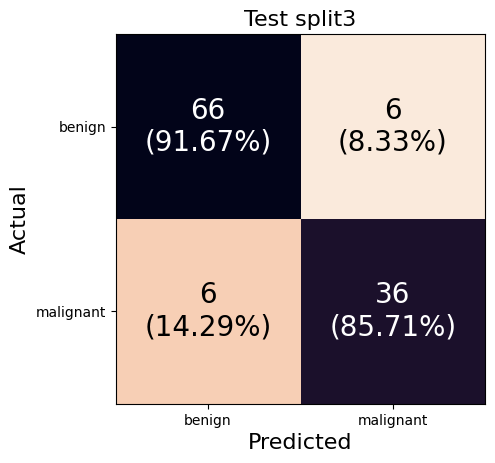

---------------------------------------
AUC validate: 95.90%
AUC test: 88.49%


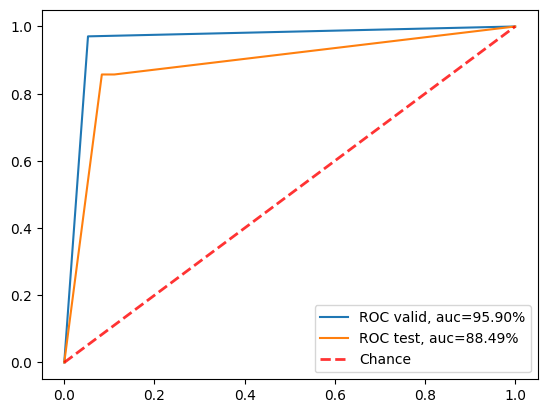

                   Variable  Importance
13          concavity_worst    0.263831
1                 area_mean    0.256839
9              concavity_se    0.185730
7                   area_se    0.119185
15  fractal_dimension_worst    0.034814
3            concavity_mean    0.030432
14           symmetry_worst    0.022046
12         smoothness_worst    0.017360
6                texture_se    0.016963
0              texture_mean    0.015897
11     fractal_dimension_se    0.015832
2           smoothness_mean    0.013536
8             smoothness_se    0.007535
4             symmetry_mean    0.000000
5    fractal_dimension_mean    0.000000
10              symmetry_se    0.000000


In [2787]:
param = 1
param1_split3_cm_val, param1_split3_cm_test, param1_split3_AUC_val, param1_split3_AUC_test = evaluate(param,split)

## Param1 Split4

In [2788]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [2817]:
dtc_train_param1(split)

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0000
TPR: 0.9706
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
70  905539         B         21.68      268.8          0.07969   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
70         0.03735         0.1274                 0.06724       1.182   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
70    6.802       0.005515       0.03735      0.01951              0.004583   

    smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst  
70            0.1086           0.1868          0.2376                  0.09206  
[70]
Confusion Matrix
----------------
[[57  0]
 [ 1 33]] 

----------------
split4
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%


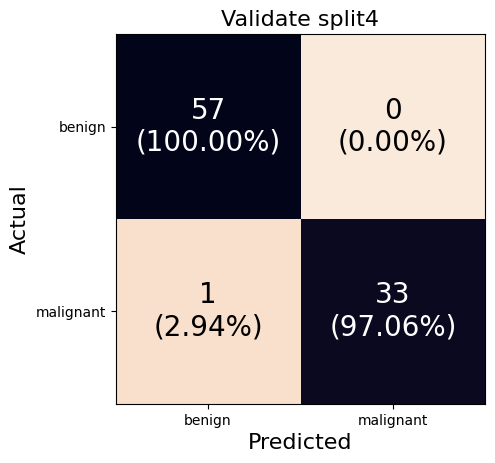

################# test set ##################
Best Threshold=1.000000
FPR: 0.0139
TPR: 0.8571
Confusion Matrix
----------------
[[71  1]
 [ 6 36]] 

----------------
split4
Sensitivity: 85.71%
Specificity: 98.61%
Accuracy: 93.86%
Precision: 97.30%
Sensitivity: 85.71%
Precision: 97.30%
F1: 91.14%


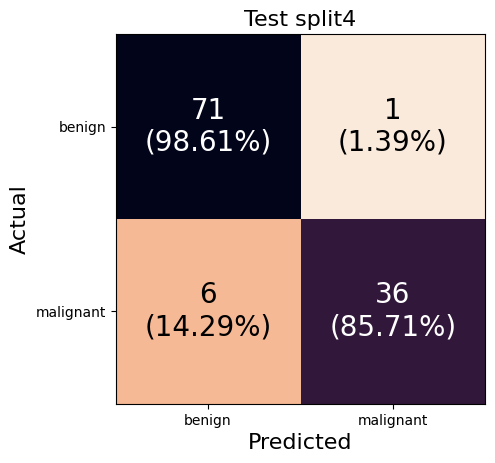

---------------------------------------
AUC validate: 98.48%
AUC test: 92.16%


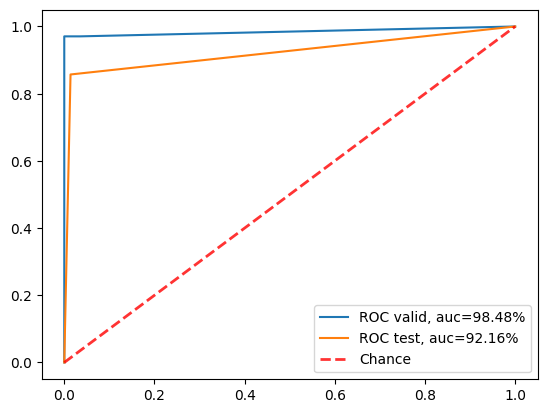

                   Variable  Importance
1                 area_mean    0.630808
13          concavity_worst    0.145201
0              texture_mean    0.070944
12         smoothness_worst    0.054425
7                   area_se    0.025487
5    fractal_dimension_mean    0.019139
4             symmetry_mean    0.017544
9              concavity_se    0.008373
6                texture_se    0.007519
2           smoothness_mean    0.006515
8             smoothness_se    0.005322
10              symmetry_se    0.004386
11     fractal_dimension_se    0.004339
3            concavity_mean    0.000000
14           symmetry_worst    0.000000
15  fractal_dimension_worst    0.000000


In [2818]:
param1_split4_cm_val, param1_split4_cm_test, param1_split4_AUC_val, param1_split4_AUC_test = evaluate(param,split)

## Param1 Split5

In [1949]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [2186]:
dtc_train_param1(split)

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=0.500000
FPR: 0.0526
TPR: 1.0000
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
22    874158         B         15.11      317.5          0.09267   
43  88518501         B         18.45      407.4          0.09345   
46     86408         B         20.76      480.4          0.09933   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
22        0.001597         0.1703                 0.06048      1.2680   
43        0.026380         0.1834                 0.05934      0.8429   
46        0.106500         0.1735                 0.07070      1.8030   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
22    26.43        0.01439      0.001597      0.02538              0.003470   
43    26.99        0.00638      0.012450      0.02292              0.001461   
46    20.48        0.01291      0.051010      0.02144              0.005891   

    smoothness_worst  co

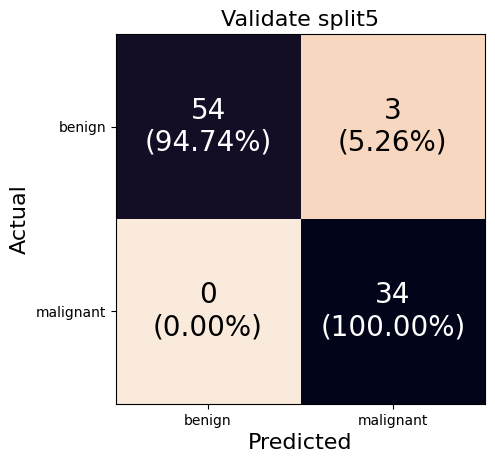

################# test set ##################
Best Threshold=0.500000
FPR: 0.0833
TPR: 0.9286
Confusion Matrix
----------------
[[66  6]
 [ 3 39]] 

----------------
split5
Sensitivity: 92.86%
Specificity: 91.67%
Accuracy: 92.11%
Precision: 86.67%
Sensitivity: 92.86%
Precision: 86.67%
F1: 89.66%


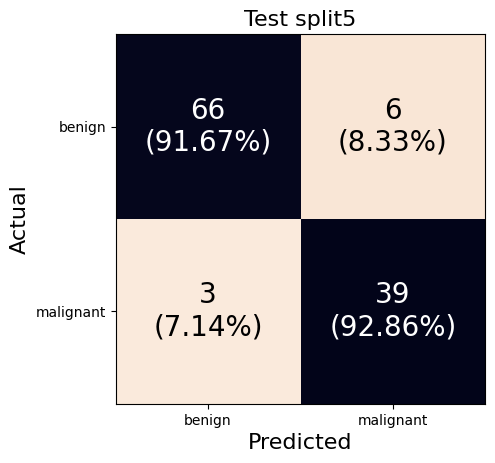

---------------------------------------
AUC validate: 97.78%
AUC test: 93.25%


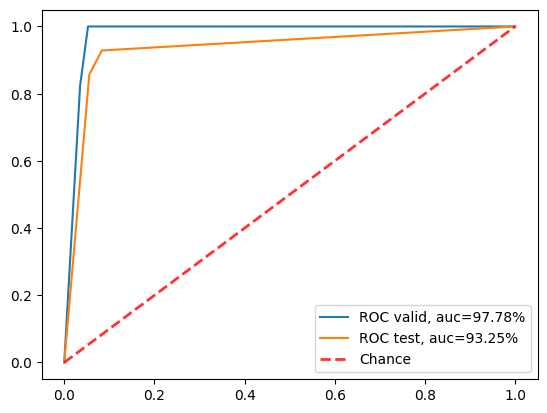

                   Variable  Importance
1                 area_mean    0.548161
12         smoothness_worst    0.138505
0              texture_mean    0.058178
7                   area_se    0.040035
2           smoothness_mean    0.039634
14           symmetry_worst    0.029316
13          concavity_worst    0.027060
3            concavity_mean    0.023980
15  fractal_dimension_worst    0.023008
8             smoothness_se    0.017544
10              symmetry_se    0.016154
9              concavity_se    0.013645
6                texture_se    0.013435
4             symmetry_mean    0.007675
5    fractal_dimension_mean    0.003487
11     fractal_dimension_se    0.000182


In [2187]:
param1_split5_cm_val, param1_split5_cm_test, param1_split5_AUC_val, param1_split5_AUC_test = evaluate(param,split)

In [2183]:
print("param1")
plot(param1_split1_cm_val , param1_split2_cm_val , param1_split3_cm_val , param1_split4_cm_val , param1_split5_cm_val)
Mean_SD("AUC1",param1_split1_AUC_val*100, param1_split2_AUC_val*100, param1_split3_AUC_val*100, param1_split4_AUC_val*100, param1_split5_AUC_val*100)

param1


NameError: name 'param1_split3_cm_val' is not defined

# ----------------------- PARAMETER 2 -----------------------

## Param2 Split1

In [2981]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [3120]:
dtc_train_param2(split)

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9706
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
8   923465         B         24.21      361.6          0.08192   
36  922840         B         16.58      320.8          0.08877   
38  883270         B         27.85      623.9          0.08223   
79  867739         M         21.91     1075.0          0.09430   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
8          0.01548         0.1976                 0.06328       1.918   
36         0.04358         0.1669                 0.06714       1.023   
38         0.11030         0.1342                 0.06129       2.324   
79         0.11530         0.1692                 0.05727       1.202   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
8    33.000       0.008263       0.01277      0.02466              0.002977   
36    7.326       0.010270       0.02613      0.0227

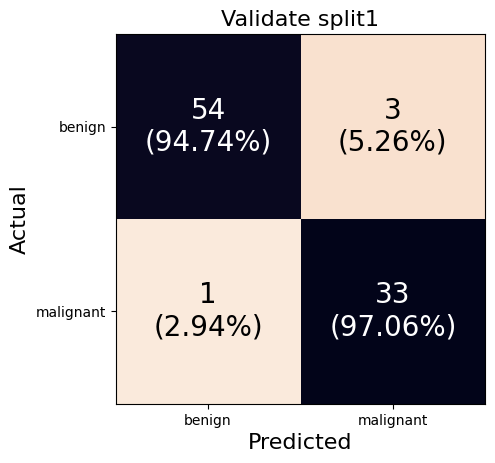

################# test set ##################
Best Threshold=1.000000
FPR: 0.0139
TPR: 0.8810
Confusion Matrix
----------------
[[71  1]
 [ 5 37]] 

----------------
split1
Sensitivity: 88.10%
Specificity: 98.61%
Accuracy: 94.74%
Precision: 97.37%
Sensitivity: 88.10%
Precision: 97.37%
F1: 92.50%


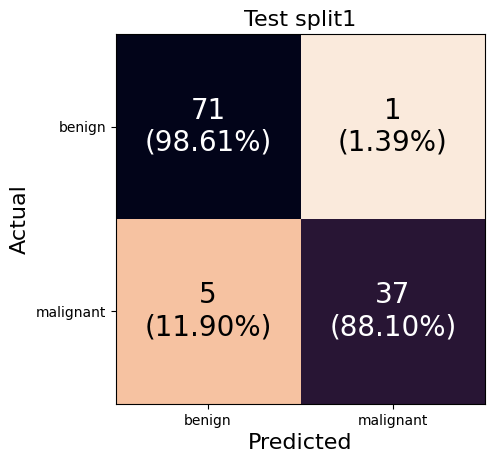

---------------------------------------
AUC validate: 95.90%
AUC test: 93.35%


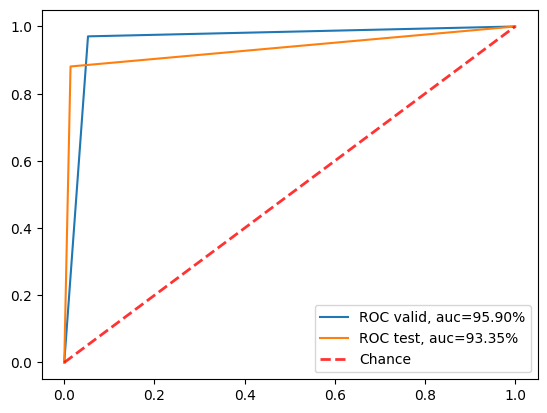

                   Variable  Importance
13          concavity_worst    0.407808
7                   area_se    0.181984
1                 area_mean    0.122967
2           smoothness_mean    0.085647
5    fractal_dimension_mean    0.062824
3            concavity_mean    0.046534
0              texture_mean    0.033663
10              symmetry_se    0.014348
9              concavity_se    0.014274
6                texture_se    0.014233
14           symmetry_worst    0.009042
8             smoothness_se    0.006678
4             symmetry_mean    0.000000
11     fractal_dimension_se    0.000000
12         smoothness_worst    0.000000
15  fractal_dimension_worst    0.000000


In [3121]:
param = 2
param2_split1_cm_val, param2_split1_cm_test, param2_split1_AUC_val, param2_split1_AUC_test = evaluate(param,split)

## Param2 Split2

In [3122]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [3210]:
dtc_train_param2(split)

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 0.9412
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
55   903554         B         17.72      446.2           0.1029   
79   867739         M         21.91     1075.0           0.0943   
88  8812877         M         20.25      761.3           0.1025   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
55         0.04783         0.1937                 0.06161      1.6520   
79         0.11530         0.1692                 0.05727      1.2020   
88         0.11470         0.1935                 0.06303      0.9209   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
55    22.22       0.008146       0.01843      0.02015              0.001798   
79    68.35       0.006001       0.02855      0.01492              0.002205   
88    32.19       0.004766       0.02384      0.01772              0.003131   

    smoothness_worst  concav

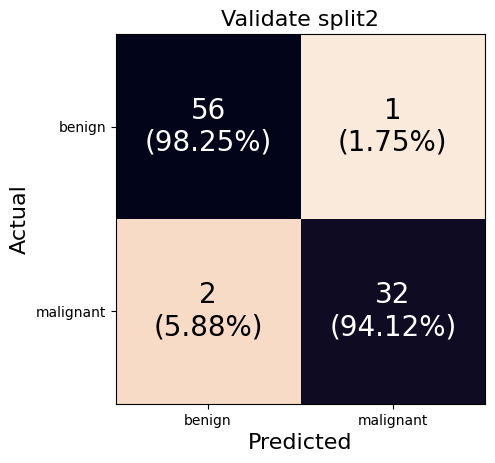

################# test set ##################
Best Threshold=1.000000
FPR: 0.0417
TPR: 0.8333
Confusion Matrix
----------------
[[69  3]
 [ 7 35]] 

----------------
split2
Sensitivity: 83.33%
Specificity: 95.83%
Accuracy: 91.23%
Precision: 92.11%
Sensitivity: 83.33%
Precision: 92.11%
F1: 87.50%


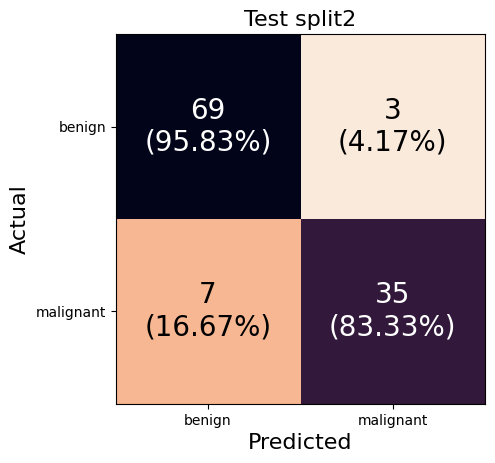

---------------------------------------
AUC validate: 96.18%
AUC test: 89.58%


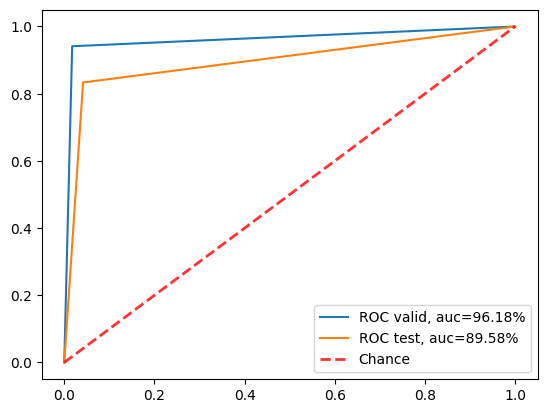

                   Variable  Importance
7                   area_se    0.522191
13          concavity_worst    0.228925
1                 area_mean    0.047891
0              texture_mean    0.039836
5    fractal_dimension_mean    0.035364
9              concavity_se    0.034290
6                texture_se    0.029537
15  fractal_dimension_worst    0.019558
3            concavity_mean    0.011751
8             smoothness_se    0.009357
11     fractal_dimension_se    0.008254
4             symmetry_mean    0.007479
14           symmetry_worst    0.005263
12         smoothness_worst    0.000304
2           smoothness_mean    0.000000
10              symmetry_se    0.000000


In [3211]:
param = 2
param2_split2_cm_val, param2_split2_cm_test, param2_split2_AUC_val, param2_split2_AUC_test = evaluate(param,split)

## Param2 Split3

In [3212]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [3379]:
dtc_train_param2(split)

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9706
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
9   917897         B         15.68      293.2          0.09492   
28  903011         B         15.50      392.0          0.08365   
50  861103         B         20.97      401.5          0.11020   
87  925622         M         30.62      716.9          0.10480   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
9          0.02330         0.1387                 0.06891       1.216   
28         0.10070         0.1810                 0.07252       1.067   
50         0.04591         0.1842                 0.07005       2.174   
87         0.25500         0.2128                 0.07152       1.205   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
9     15.24       0.008732       0.01062      0.01824              0.003494   
28    22.97       0.010380       0.09472      0.0121

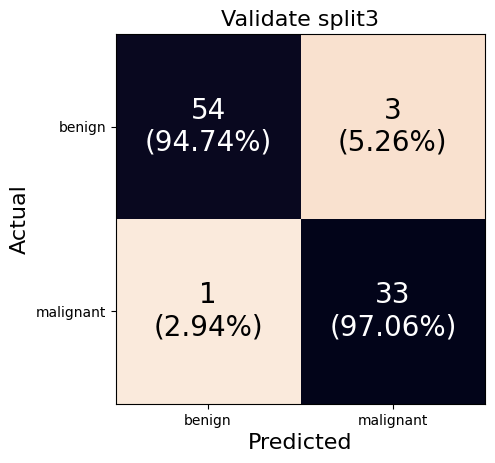

################# test set ##################
Best Threshold=1.000000
FPR: 0.0833
TPR: 0.9286
Confusion Matrix
----------------
[[66  6]
 [ 3 39]] 

----------------
split3
Sensitivity: 92.86%
Specificity: 91.67%
Accuracy: 92.11%
Precision: 86.67%
Sensitivity: 92.86%
Precision: 86.67%
F1: 89.66%


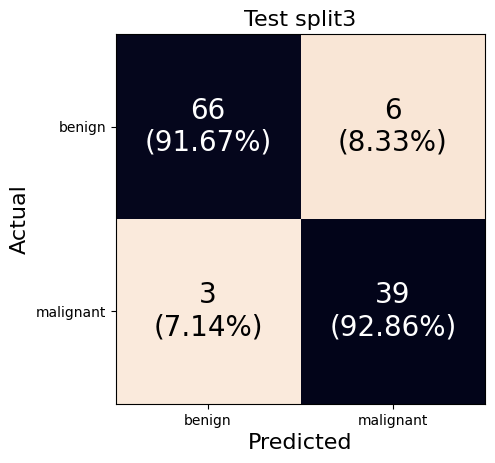

---------------------------------------
AUC validate: 95.90%
AUC test: 92.26%


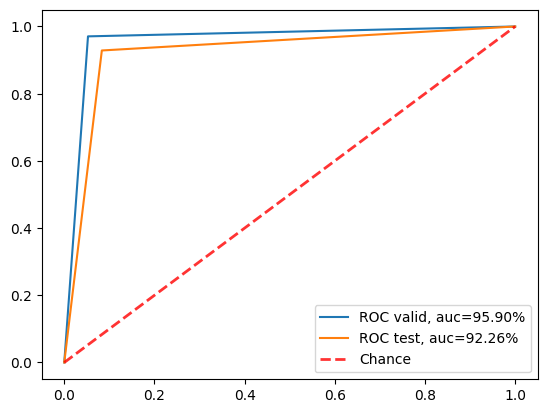

                   Variable  Importance
13          concavity_worst    0.263831
1                 area_mean    0.256839
9              concavity_se    0.185730
7                   area_se    0.119185
15  fractal_dimension_worst    0.034814
3            concavity_mean    0.030432
14           symmetry_worst    0.022046
12         smoothness_worst    0.017360
6                texture_se    0.016963
0              texture_mean    0.015897
11     fractal_dimension_se    0.015832
2           smoothness_mean    0.013536
8             smoothness_se    0.007535
4             symmetry_mean    0.000000
5    fractal_dimension_mean    0.000000
10              symmetry_se    0.000000


In [3380]:
param = 2
param2_split3_cm_val, param2_split3_cm_test, param2_split3_AUC_val, param2_split3_AUC_test = evaluate(param,split)

## Param2 Split4

In [3561]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [3578]:
dtc_train_param2(split)

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0702
TPR: 1.0000
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
38    883270         B         27.85      623.9          0.08223   
43  88518501         B         18.45      407.4          0.09345   
45   8711002         B         15.34      538.9          0.09384   
50    861103         B         20.97      401.5          0.11020   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
38         0.11030         0.1342                 0.06129      2.3240   
43         0.02638         0.1834                 0.05934      0.8429   
45         0.09293         0.1822                 0.06207      0.7927   
50         0.04591         0.1842                 0.07005      2.1740   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
38    29.96       0.006307       0.03850      0.01185              0.003589   
43    26.99       0.006380       0.01245  

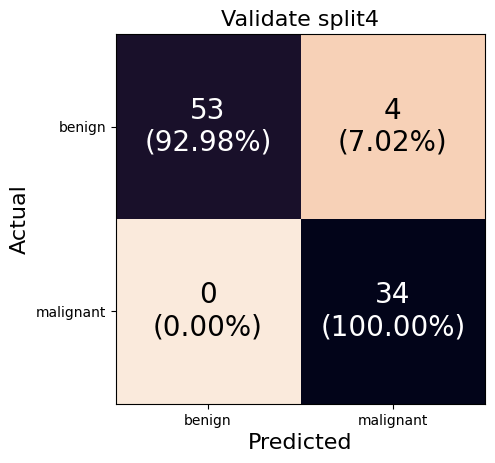

################# test set ##################
Best Threshold=1.000000
FPR: 0.1250
TPR: 0.8810
Confusion Matrix
----------------
[[63  9]
 [ 5 37]] 

----------------
split4
Sensitivity: 88.10%
Specificity: 87.50%
Accuracy: 87.72%
Precision: 80.43%
Sensitivity: 88.10%
Precision: 80.43%
F1: 84.09%


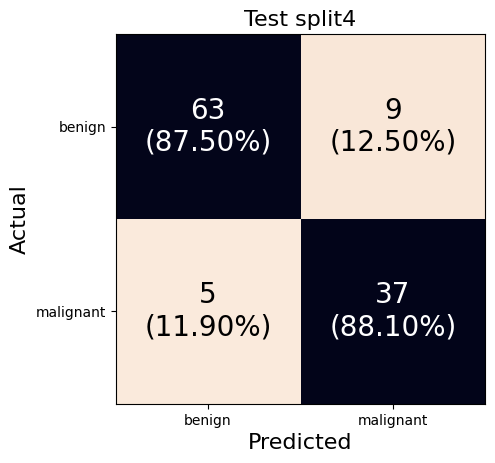

---------------------------------------
AUC validate: 96.49%
AUC test: 87.80%


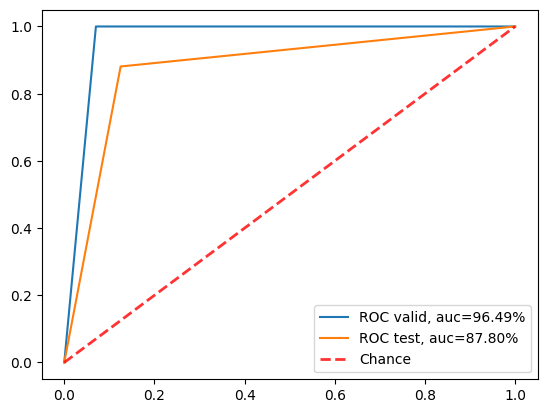

                   Variable  Importance
1                 area_mean    0.630808
13          concavity_worst    0.145201
0              texture_mean    0.070944
12         smoothness_worst    0.054425
7                   area_se    0.025487
5    fractal_dimension_mean    0.019139
4             symmetry_mean    0.017544
9              concavity_se    0.008373
6                texture_se    0.007519
2           smoothness_mean    0.006515
8             smoothness_se    0.005322
10              symmetry_se    0.004386
11     fractal_dimension_se    0.004339
3            concavity_mean    0.000000
14           symmetry_worst    0.000000
15  fractal_dimension_worst    0.000000


In [3579]:
param2_split4_cm_val, param2_split4_cm_test, param2_split4_AUC_val, param2_split4_AUC_test = evaluate(param,split)

## Param2 Split5

In [3580]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [3673]:
dtc_train_param2(split)

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9118
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
12   914862         B         16.74      689.4          0.09883   
15  9013005         B         16.07      579.1          0.08302   
44   911366         B         18.18      408.8          0.11750   
57  8810528         B         18.94      428.0          0.08871   
62   914580         B         17.31      480.1          0.08928   
87   925622         M         30.62      716.9          0.10480   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
12         0.07721         0.1668                 0.06869      0.8423   
15         0.02556         0.1872                 0.05669      0.5066   
44         0.10200         0.1957                 0.07255      1.7400   
57         0.02669         0.1533                 0.06057      0.8652   
62         0.03609         0.1526                 0.06046      0.7810   

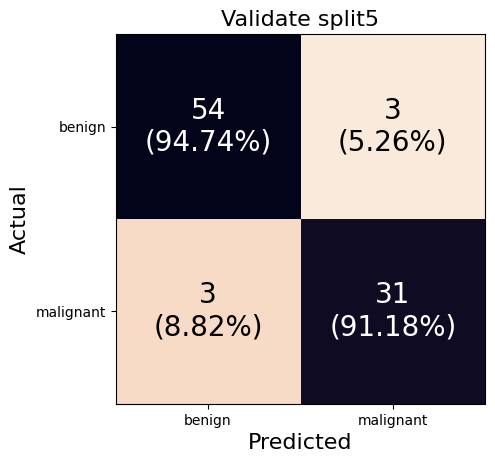

################# test set ##################
Best Threshold=1.000000
FPR: 0.1250
TPR: 0.8810
Confusion Matrix
----------------
[[63  9]
 [ 5 37]] 

----------------
split5
Sensitivity: 88.10%
Specificity: 87.50%
Accuracy: 87.72%
Precision: 80.43%
Sensitivity: 88.10%
Precision: 80.43%
F1: 84.09%


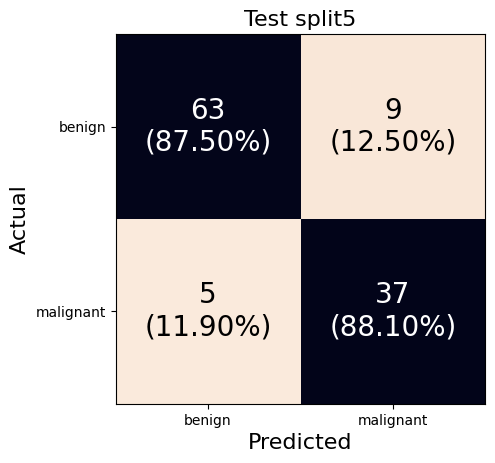

---------------------------------------
AUC validate: 92.96%
AUC test: 87.80%


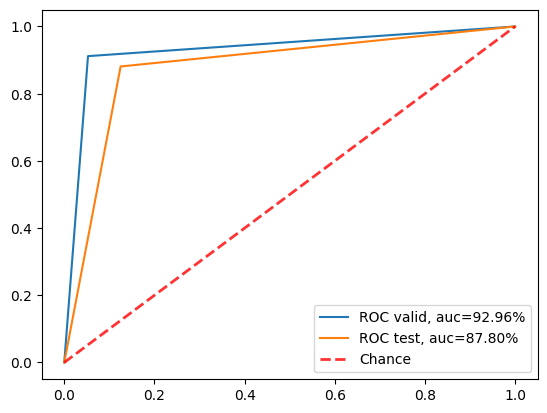

                   Variable  Importance
1                 area_mean    0.548161
12         smoothness_worst    0.138505
0              texture_mean    0.058178
7                   area_se    0.040035
2           smoothness_mean    0.039634
14           symmetry_worst    0.029316
13          concavity_worst    0.027060
3            concavity_mean    0.023980
15  fractal_dimension_worst    0.023008
8             smoothness_se    0.017544
10              symmetry_se    0.016154
9              concavity_se    0.013645
6                texture_se    0.013435
4             symmetry_mean    0.007675
5    fractal_dimension_mean    0.003487
11     fractal_dimension_se    0.000182


In [3674]:
param2_split5_cm_val, param2_split5_cm_test, param2_split5_AUC_val, param2_split5_AUC_test = evaluate(param,split)

# ----------------------- PARAMETER 3 -----------------------

## Param3 Split1

In [3675]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [3733]:
dtc_train_param3(split)

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9118
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
26   907409         B         14.98      333.6          0.09816   
35  8911230         B         14.16      396.6          0.09379   
55   903554         B         17.72      446.2          0.10290   
79   867739         M         21.91     1075.0          0.09430   
81   846381         M         23.95      782.7          0.08401   
90    91485         M         21.24     1320.0          0.10850   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
26        0.063350         0.1925                 0.06915       1.127   
35        0.001487         0.1954                 0.05821       1.280   
55        0.047830         0.1937                 0.06161       1.652   
79        0.115300         0.1692                 0.05727       1.202   
81        0.099380         0.1847                 0.05338       1.078   

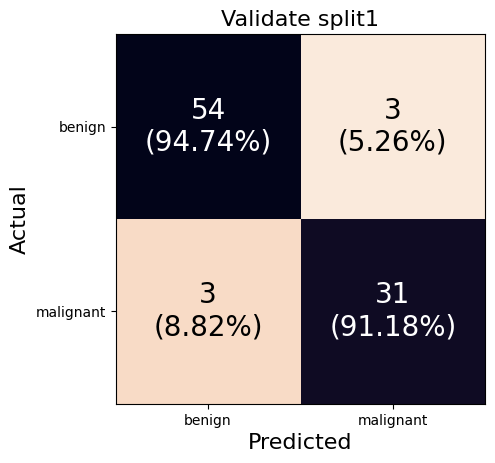

################# test set ##################
Best Threshold=1.000000
FPR: 0.0417
TPR: 0.8571
Confusion Matrix
----------------
[[69  3]
 [ 6 36]] 

----------------
split1
Sensitivity: 85.71%
Specificity: 95.83%
Accuracy: 92.11%
Precision: 92.31%
Sensitivity: 85.71%
Precision: 92.31%
F1: 88.89%


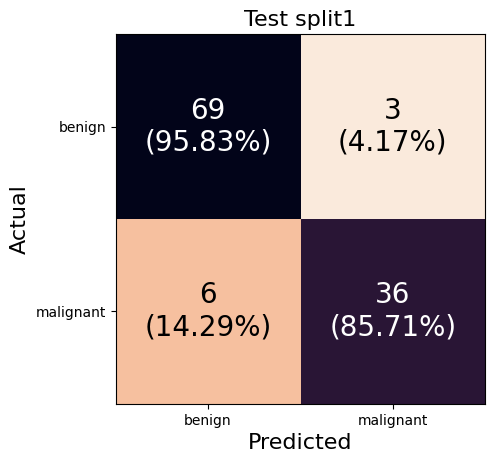

---------------------------------------
AUC validate: 92.96%
AUC test: 90.77%


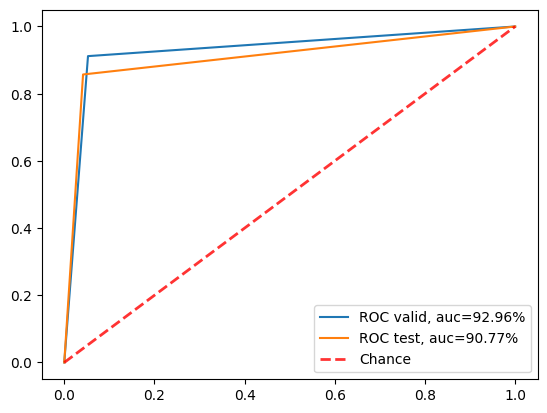

                   Variable  Importance
13          concavity_worst    0.407808
7                   area_se    0.181984
1                 area_mean    0.122967
2           smoothness_mean    0.085647
5    fractal_dimension_mean    0.062824
3            concavity_mean    0.046534
0              texture_mean    0.033663
10              symmetry_se    0.014348
9              concavity_se    0.014274
6                texture_se    0.014233
14           symmetry_worst    0.009042
8             smoothness_se    0.006678
4             symmetry_mean    0.000000
11     fractal_dimension_se    0.000000
12         smoothness_worst    0.000000
15  fractal_dimension_worst    0.000000


In [3734]:
param = 3
param3_split1_cm_val, param3_split1_cm_test, param3_split1_AUC_val, param3_split1_AUC_test = evaluate(param,split)

## Param3 Split2

In [3735]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [3806]:
dtc_train_param3(split)

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 1.0000
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
11   868871         B         13.39      384.8          0.11640   
19   909777         B         18.32      340.9          0.08142   
48  9113846         B         29.97      465.4          0.07699   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
11         0.04635         0.1771                 0.06072       1.343   
19         0.01993         0.2372                 0.05768       2.542   
48         0.00000         0.1701                 0.05960       3.647   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
11    26.33       0.011270       0.02187      0.01580              0.003442   
19    13.12       0.010720       0.01993      0.01717              0.004492   
48    35.13       0.007339       0.00000      0.03141              0.003136   

    smoothness_worst  concav

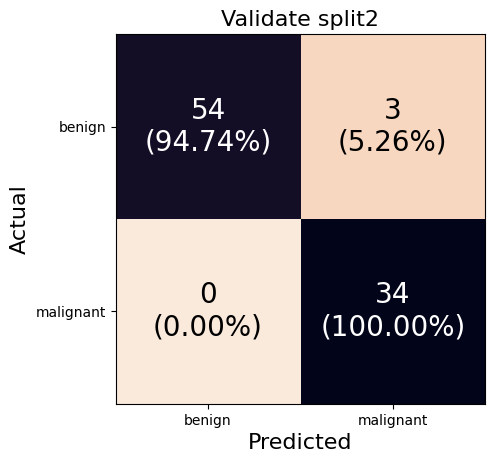

################# test set ##################
Best Threshold=1.000000
FPR: 0.0972
TPR: 0.9048
Confusion Matrix
----------------
[[65  7]
 [ 4 38]] 

----------------
split2
Sensitivity: 90.48%
Specificity: 90.28%
Accuracy: 90.35%
Precision: 84.44%
Sensitivity: 90.48%
Precision: 84.44%
F1: 87.36%


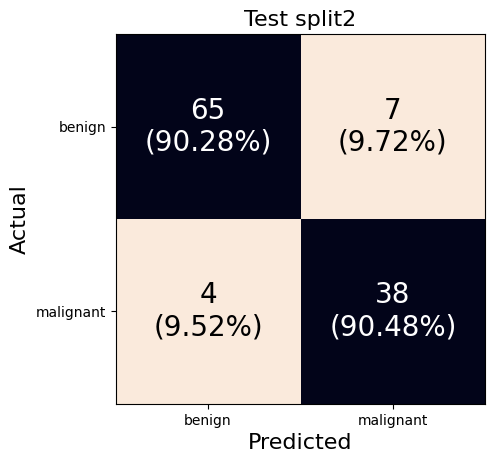

---------------------------------------
AUC validate: 97.37%
AUC test: 90.38%


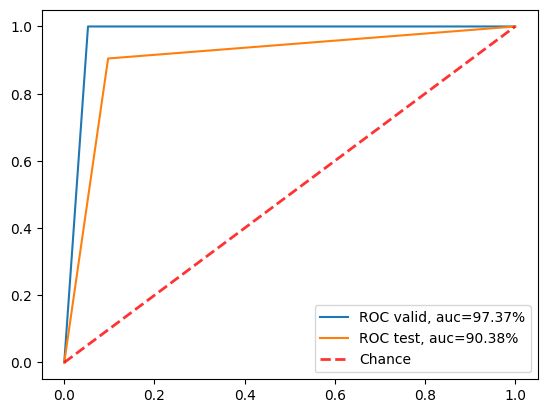

                   Variable  Importance
7                   area_se    0.522191
13          concavity_worst    0.228925
1                 area_mean    0.047891
0              texture_mean    0.039836
5    fractal_dimension_mean    0.035364
9              concavity_se    0.034290
6                texture_se    0.029537
15  fractal_dimension_worst    0.019558
3            concavity_mean    0.011751
8             smoothness_se    0.009357
11     fractal_dimension_se    0.008254
4             symmetry_mean    0.007479
14           symmetry_worst    0.005263
12         smoothness_worst    0.000304
2           smoothness_mean    0.000000
10              symmetry_se    0.000000


In [3807]:
param = 3
param3_split2_cm_val, param3_split2_cm_test, param3_split2_AUC_val, param3_split2_AUC_test = evaluate(param,split)

## Param3 Split3

In [4031]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [4078]:
dtc_train_param3(split)

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0175
TPR: 0.9412
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
28  903011         B         15.50      392.0          0.08365   
81  846381         M         23.95      782.7          0.08401   
87  925622         M         30.62      716.9          0.10480   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
28         0.10070         0.1810                 0.07252       1.067   
81         0.09938         0.1847                 0.05338       1.078   
87         0.25500         0.2128                 0.07152       1.205   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
28    22.97       0.010380       0.09472      0.01219              0.012330   
81    36.58       0.009769       0.05051      0.02981              0.003002   
87    22.65       0.004625       0.07359      0.02137              0.006142   

    smoothness_worst  concavity_

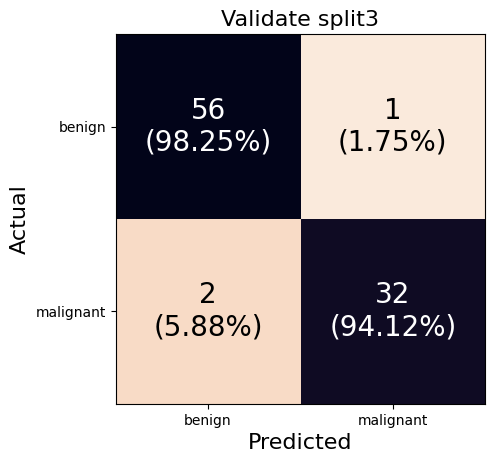

################# test set ##################
Best Threshold=1.000000
FPR: 0.0972
TPR: 0.8333
Confusion Matrix
----------------
[[65  7]
 [ 7 35]] 

----------------
split3
Sensitivity: 83.33%
Specificity: 90.28%
Accuracy: 87.72%
Precision: 83.33%
Sensitivity: 83.33%
Precision: 83.33%
F1: 83.33%


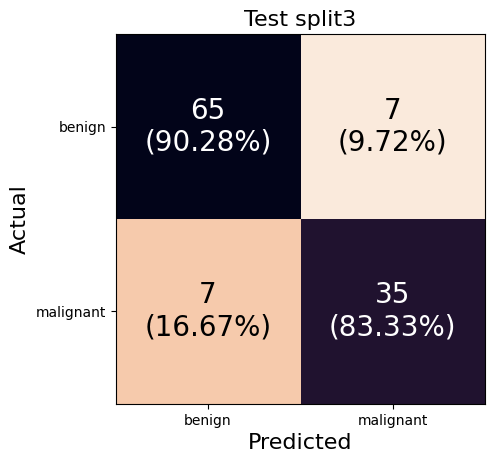

---------------------------------------
AUC validate: 96.18%
AUC test: 86.81%


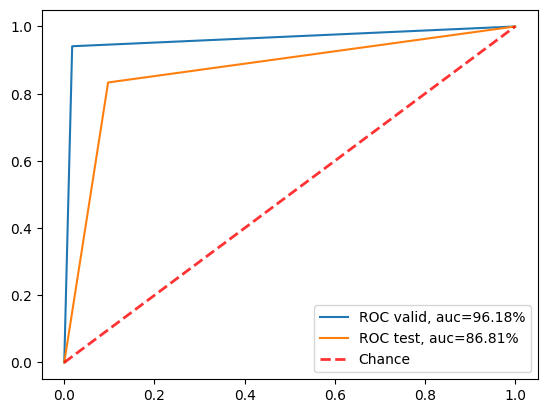

                   Variable  Importance
13          concavity_worst    0.263831
1                 area_mean    0.256839
9              concavity_se    0.185730
7                   area_se    0.119185
15  fractal_dimension_worst    0.034814
3            concavity_mean    0.030432
14           symmetry_worst    0.022046
12         smoothness_worst    0.017360
6                texture_se    0.016963
0              texture_mean    0.015897
11     fractal_dimension_se    0.015832
2           smoothness_mean    0.013536
8             smoothness_se    0.007535
4             symmetry_mean    0.000000
5    fractal_dimension_mean    0.000000
10              symmetry_se    0.000000


In [4079]:
param = 3
param3_split3_cm_val, param3_split3_cm_test, param3_split3_AUC_val, param3_split3_AUC_test = evaluate(param,split)

## Param3 Split4

In [4257]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [4298]:
dtc_train_param3(split)

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0702
TPR: 0.9706
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
7   90401602         B         17.46      508.3          0.08044   
20    874373         B         17.19      420.3          0.09774   
37    884437         B         19.86      337.7          0.10700   
43  88518501         B         18.45      407.4          0.09345   
72    874858         M         23.12      609.9          0.10750   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
7          0.07390         0.1574                 0.05750      1.2650   
20         0.03809         0.1516                 0.06095      0.7655   
37         0.04831         0.1737                 0.06440      2.6120   
43         0.02638         0.1834                 0.05934      0.8429   
72         0.19810         0.2384                 0.07542      2.1100   

    area_se  smoothness_se  concavity_se  symmetry_se  frac

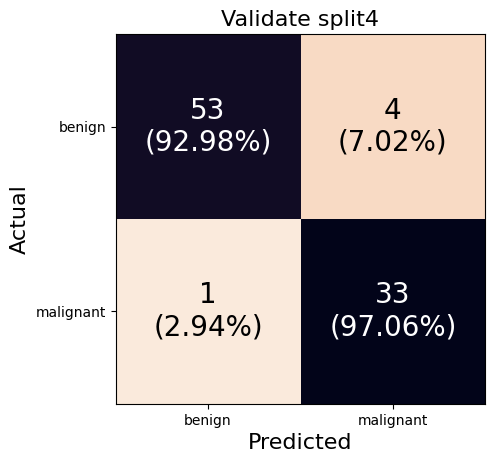

################# test set ##################
Best Threshold=1.000000
FPR: 0.0833
TPR: 0.9048
Confusion Matrix
----------------
[[66  6]
 [ 4 38]] 

----------------
split4
Sensitivity: 90.48%
Specificity: 91.67%
Accuracy: 91.23%
Precision: 86.36%
Sensitivity: 90.48%
Precision: 86.36%
F1: 88.37%


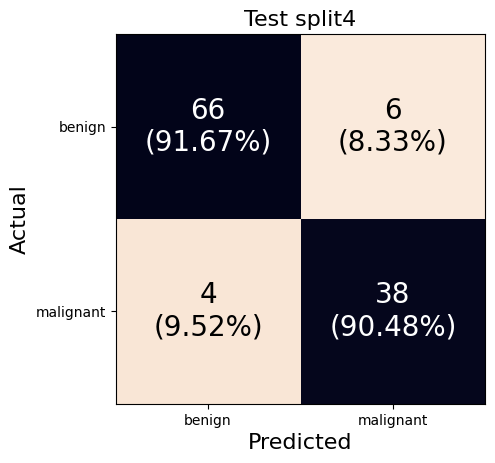

---------------------------------------
AUC validate: 95.02%
AUC test: 91.07%


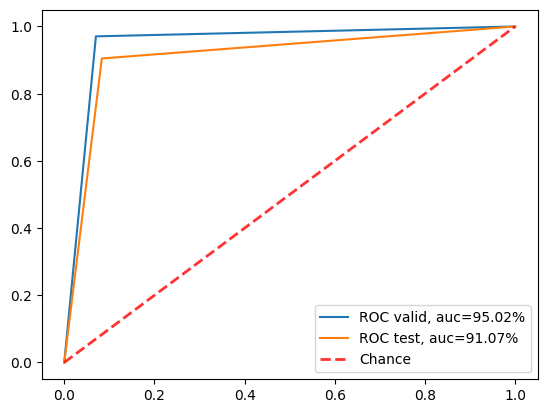

                   Variable  Importance
1                 area_mean    0.630808
13          concavity_worst    0.145201
0              texture_mean    0.070944
12         smoothness_worst    0.054425
7                   area_se    0.025487
5    fractal_dimension_mean    0.019139
4             symmetry_mean    0.017544
9              concavity_se    0.008373
6                texture_se    0.007519
2           smoothness_mean    0.006515
8             smoothness_se    0.005322
10              symmetry_se    0.004386
11     fractal_dimension_se    0.004339
3            concavity_mean    0.000000
14           symmetry_worst    0.000000
15  fractal_dimension_worst    0.000000


In [4299]:
param3_split4_cm_val, param3_split4_cm_test, param3_split4_AUC_val, param3_split4_AUC_test = evaluate(param,split)

## Param3 Split5

In [4456]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [4535]:
dtc_train_param3(split)

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9412
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
18   8712291         B         19.76      690.2          0.08421   
41    891923         B         13.27      582.7          0.09198   
43  88518501         B         18.45      407.4          0.09345   
79    867739         M         21.91     1075.0          0.09430   
81    846381         M         23.95      782.7          0.08401   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
18         0.01947         0.1515                 0.05266      1.0650   
41         0.01063         0.1592                 0.05912      0.6946   
43         0.02638         0.1834                 0.05934      0.8429   
79         0.11530         0.1692                 0.05727      1.2020   
81         0.09938         0.1847                 0.05338      1.0780   

    area_se  smoothness_se  concavity_se  symmetry_se  frac

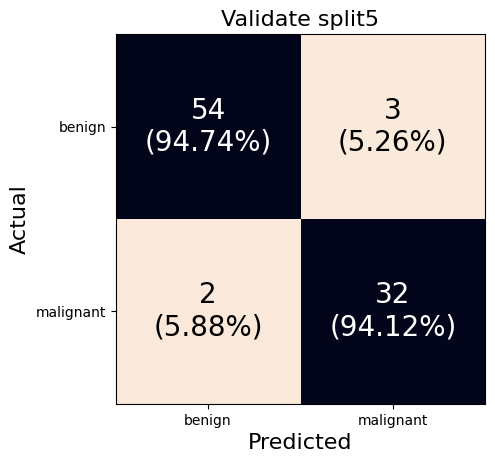

################# test set ##################
Best Threshold=1.000000
FPR: 0.0694
TPR: 0.9048
Confusion Matrix
----------------
[[67  5]
 [ 4 38]] 

----------------
split5
Sensitivity: 90.48%
Specificity: 93.06%
Accuracy: 92.11%
Precision: 88.37%
Sensitivity: 90.48%
Precision: 88.37%
F1: 89.41%


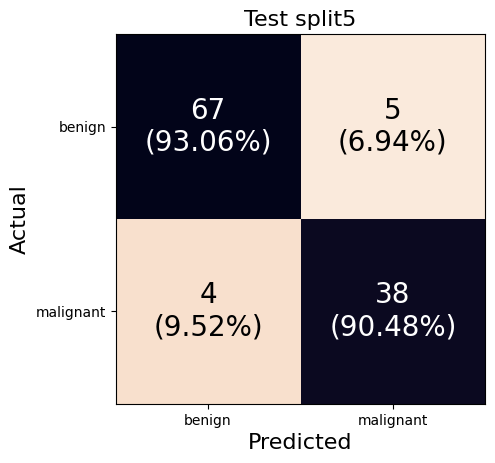

---------------------------------------
AUC validate: 94.43%
AUC test: 91.77%


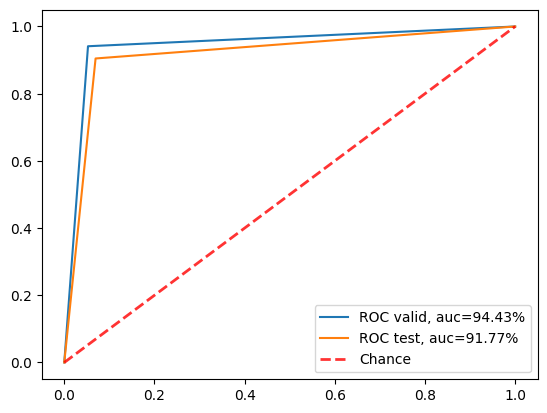

                   Variable  Importance
1                 area_mean    0.548161
12         smoothness_worst    0.138505
0              texture_mean    0.058178
7                   area_se    0.040035
2           smoothness_mean    0.039634
14           symmetry_worst    0.029316
13          concavity_worst    0.027060
3            concavity_mean    0.023980
15  fractal_dimension_worst    0.023008
8             smoothness_se    0.017544
10              symmetry_se    0.016154
9              concavity_se    0.013645
6                texture_se    0.013435
4             symmetry_mean    0.007675
5    fractal_dimension_mean    0.003487
11     fractal_dimension_se    0.000182


In [4536]:
param3_split5_cm_val, param3_split5_cm_test, param3_split5_AUC_val, param3_split5_AUC_test = evaluate(param,split)

# ----------------------- PARAMETER 4 -----------------------

## Param4 Split1

In [4915]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [5244]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2, 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_val, y_val)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [5265]:
dtc_train_param4(split)

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9118
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
18  8712291         B         19.76      690.2          0.08421   
36   922840         B         16.58      320.8          0.08877   
45  8711002         B         15.34      538.9          0.09384   
79   867739         M         21.91     1075.0          0.09430   
83  8911163         M         24.48      998.9          0.08855   
87   925622         M         30.62      716.9          0.10480   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
18         0.01947         0.1515                 0.05266      1.0650   
36         0.04358         0.1669                 0.06714      1.0230   
45         0.09293         0.1822                 0.06207      0.7927   
79         0.11530         0.1692                 0.05727      1.2020   
83         0.05699         0.1538                 0.05510      1.4330   

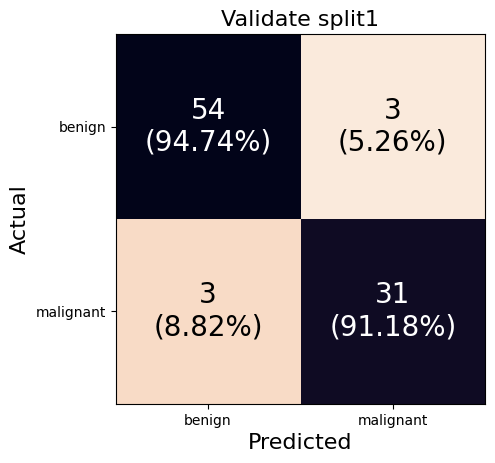

################# test set ##################
Best Threshold=1.000000
FPR: 0.0417
TPR: 0.8333
Confusion Matrix
----------------
[[69  3]
 [ 7 35]] 

----------------
split1
Sensitivity: 83.33%
Specificity: 95.83%
Accuracy: 91.23%
Precision: 92.11%
Sensitivity: 83.33%
Precision: 92.11%
F1: 87.50%


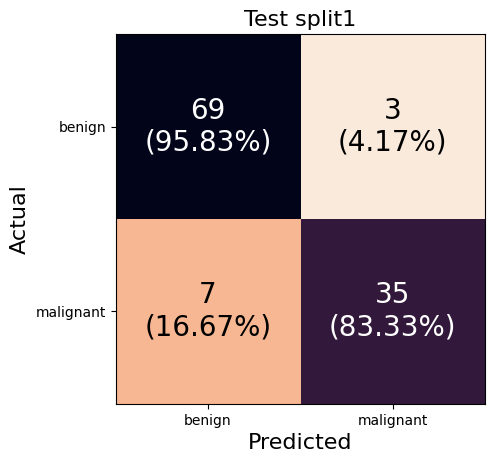

---------------------------------------
AUC validate: 92.96%
AUC test: 89.58%


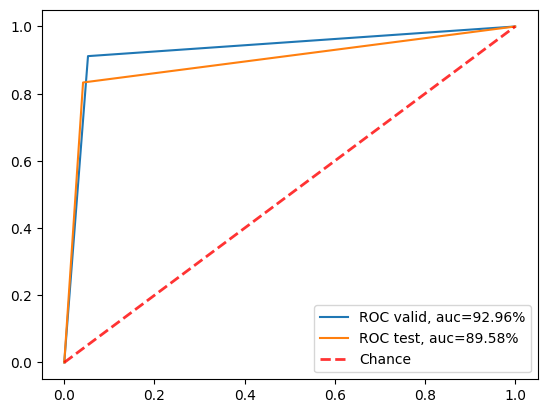

                   Variable  Importance
13          concavity_worst    0.407808
7                   area_se    0.181984
1                 area_mean    0.122967
2           smoothness_mean    0.085647
5    fractal_dimension_mean    0.062824
3            concavity_mean    0.046534
0              texture_mean    0.033663
10              symmetry_se    0.014348
9              concavity_se    0.014274
6                texture_se    0.014233
14           symmetry_worst    0.009042
8             smoothness_se    0.006678
4             symmetry_mean    0.000000
11     fractal_dimension_se    0.000000
12         smoothness_worst    0.000000
15  fractal_dimension_worst    0.000000


In [5266]:
param = 4
param4_split1_cm_val, param4_split1_cm_test, param4_split1_AUC_val, param4_split1_AUC_test = evaluate(param,split)

## Param4 Split2

In [5423]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [5472]:
dtc_train_param4(split)

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0702
TPR: 0.8529
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
14    863270         B         18.54      466.7          0.08477   
43  88518501         B         18.45      407.4          0.09345   
45   8711002         B         15.34      538.9          0.09384   
46     86408         B         20.76      480.4          0.09933   
57   8810528         B         18.94      428.0          0.08871   
68   8913049         B         19.96      394.1          0.08020   
70    905539         B         21.68      268.8          0.07969   
79    867739         M         21.91     1075.0          0.09430   
84    916838         M         20.26     1214.0          0.10370   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
14         0.02643         0.1602                 0.06066      0.8944   
43         0.02638         0.1834                 0.05934      0.8429   
45     

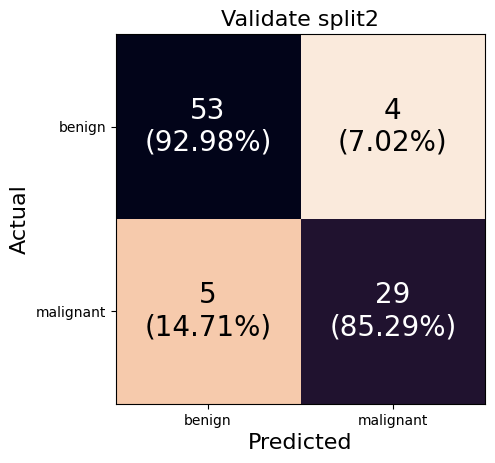

################# test set ##################
Best Threshold=1.000000
FPR: 0.0833
TPR: 0.8333
Confusion Matrix
----------------
[[66  6]
 [ 7 35]] 

----------------
split2
Sensitivity: 83.33%
Specificity: 91.67%
Accuracy: 88.60%
Precision: 85.37%
Sensitivity: 83.33%
Precision: 85.37%
F1: 84.34%


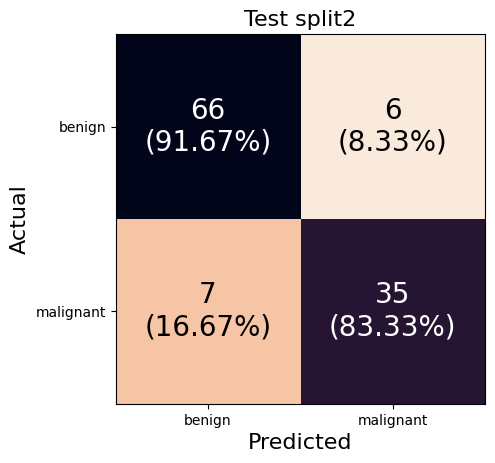

---------------------------------------
AUC validate: 89.14%
AUC test: 87.50%


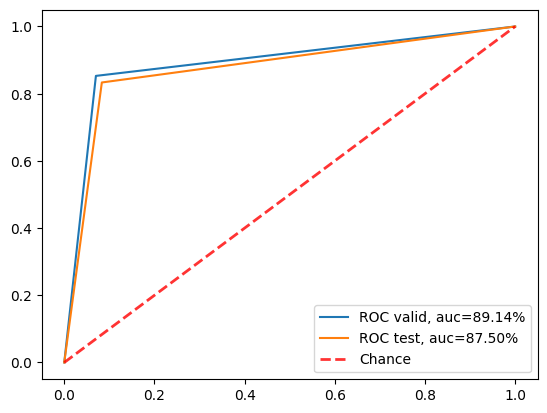

                   Variable  Importance
7                   area_se    0.522191
13          concavity_worst    0.228925
1                 area_mean    0.047891
0              texture_mean    0.039836
5    fractal_dimension_mean    0.035364
9              concavity_se    0.034290
6                texture_se    0.029537
15  fractal_dimension_worst    0.019558
3            concavity_mean    0.011751
8             smoothness_se    0.009357
11     fractal_dimension_se    0.008254
4             symmetry_mean    0.007479
14           symmetry_worst    0.005263
12         smoothness_worst    0.000304
2           smoothness_mean    0.000000
10              symmetry_se    0.000000


In [5473]:
param = 4
param4_split2_cm_val, param4_split2_cm_test, param4_split2_AUC_val, param4_split2_AUC_test = evaluate(param,split)

## Param4 Split3

In [5477]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [5478]:
dtc_train_param4(split)

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.8824
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
22  874158         B         15.11      317.5          0.09267   
28  903011         B         15.50      392.0          0.08365   
36  922840         B         16.58      320.8          0.08877   
77  863030         M         15.56      530.2          0.13980   
79  867739         M         21.91     1075.0          0.09430   
81  846381         M         23.95      782.7          0.08401   
87  925622         M         30.62      716.9          0.10480   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
22        0.001597         0.1703                 0.06048      1.2680   
28        0.100700         0.1810                 0.07252      1.0670   
36        0.043580         0.1669                 0.06714      1.0230   
77        0.207100         0.1925                 0.07692      0.9238   
79        0.1

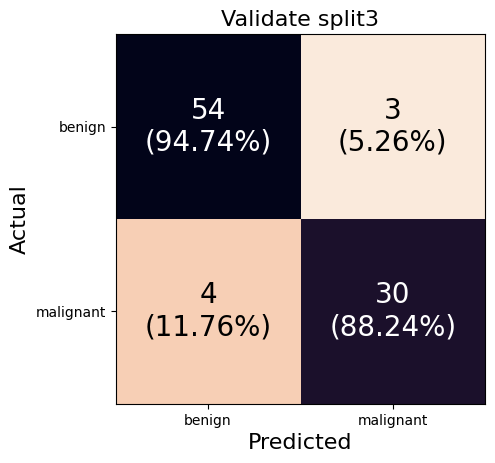

################# test set ##################
Best Threshold=1.000000
FPR: 0.0278
TPR: 0.8571
Confusion Matrix
----------------
[[70  2]
 [ 6 36]] 

----------------
split3
Sensitivity: 85.71%
Specificity: 97.22%
Accuracy: 92.98%
Precision: 94.74%
Sensitivity: 85.71%
Precision: 94.74%
F1: 90.00%


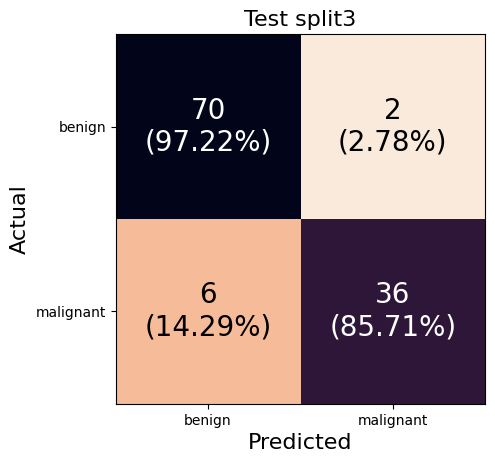

---------------------------------------
AUC validate: 91.49%
AUC test: 91.47%


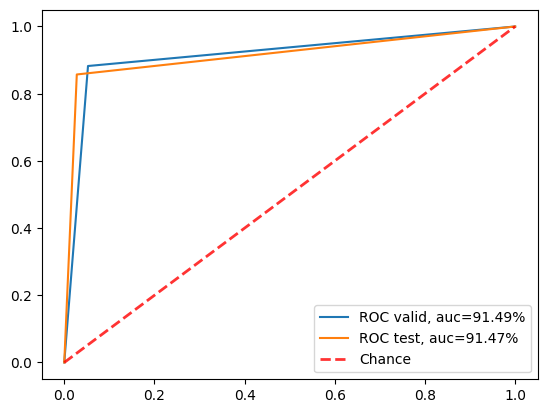

                   Variable  Importance
13          concavity_worst    0.263831
1                 area_mean    0.256839
9              concavity_se    0.185730
7                   area_se    0.119185
15  fractal_dimension_worst    0.034814
3            concavity_mean    0.030432
14           symmetry_worst    0.022046
12         smoothness_worst    0.017360
6                texture_se    0.016963
0              texture_mean    0.015897
11     fractal_dimension_se    0.015832
2           smoothness_mean    0.013536
8             smoothness_se    0.007535
4             symmetry_mean    0.000000
5    fractal_dimension_mean    0.000000
10              symmetry_se    0.000000


In [5479]:
param = 4
param4_split3_cm_val, param4_split3_cm_test, param4_split3_AUC_val, param4_split3_AUC_test = evaluate(param,split)

## Param 4 Split4

In [5519]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [5544]:
dtc_train_param4(split)

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0877
TPR: 0.8235
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
7   90401602         B         17.46      508.3          0.08044   
20    874373         B         17.19      420.3          0.09774   
31    925311         B         29.37      386.0          0.07449   
37    884437         B         19.86      337.7          0.10700   
43  88518501         B         18.45      407.4          0.09345   
59    891703         B         17.46      432.7          0.08372   
61    922297         B         20.70      584.8          0.09578   
69    921385         B         14.44      402.9          0.09984   
70    905539         B         21.68      268.8          0.07969   
74    864877         M         22.91      782.6          0.11550   
79    867739         M         21.91     1075.0          0.09430   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
7          0.0739

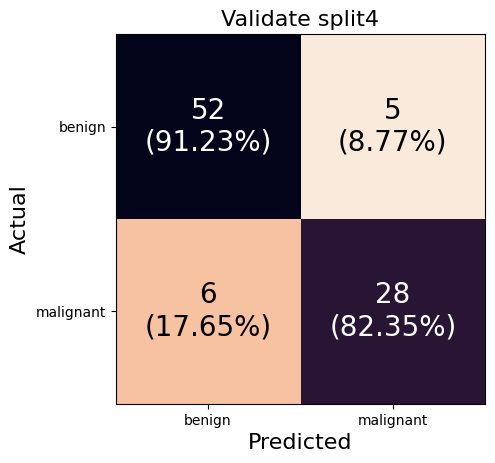

################# test set ##################
Best Threshold=1.000000
FPR: 0.0694
TPR: 0.8095
Confusion Matrix
----------------
[[67  5]
 [ 8 34]] 

----------------
split4
Sensitivity: 80.95%
Specificity: 93.06%
Accuracy: 88.60%
Precision: 87.18%
Sensitivity: 80.95%
Precision: 87.18%
F1: 83.95%


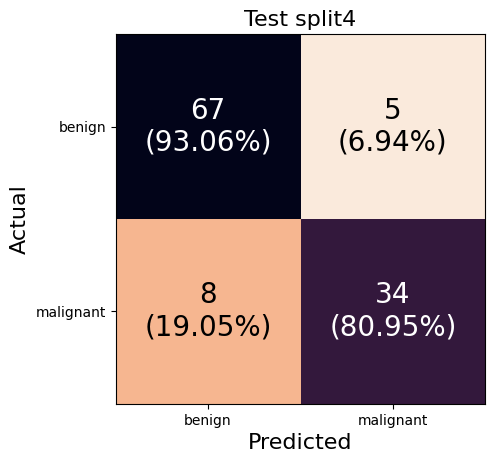

---------------------------------------
AUC validate: 86.79%
AUC test: 87.00%


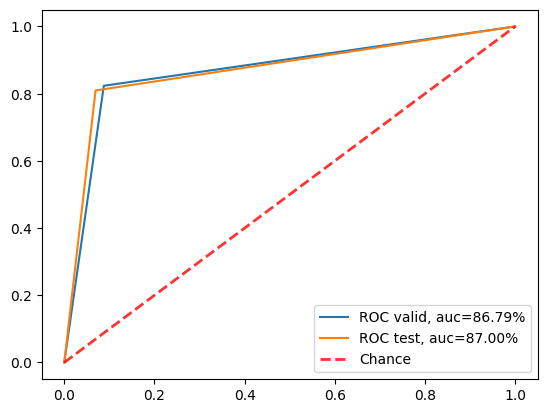

                   Variable  Importance
1                 area_mean    0.630808
13          concavity_worst    0.145201
0              texture_mean    0.070944
12         smoothness_worst    0.054425
7                   area_se    0.025487
5    fractal_dimension_mean    0.019139
4             symmetry_mean    0.017544
9              concavity_se    0.008373
6                texture_se    0.007519
2           smoothness_mean    0.006515
8             smoothness_se    0.005322
10              symmetry_se    0.004386
11     fractal_dimension_se    0.004339
3            concavity_mean    0.000000
14           symmetry_worst    0.000000
15  fractal_dimension_worst    0.000000


In [5545]:
param4_split4_cm_val, param4_split4_cm_test, param4_split4_AUC_val, param4_split4_AUC_test = evaluate(param,split)

## Param4 Split5

In [5546]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [5549]:
dtc_train_param4(split)

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 0.8235
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
5     91505         B         16.32      476.3          0.11580   
44   911366         B         18.18      408.8          0.11750   
57  8810528         B         18.94      428.0          0.08871   
62   914580         B         17.31      480.1          0.08928   
66   883852         B         18.19      389.4          0.09592   
75   915460         M         23.95      731.3          0.11830   
79   867739         M         21.91     1075.0          0.09430   
87   925622         M         30.62      716.9          0.10480   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
5          0.05928         0.1943                 0.06612      1.0950   
44         0.10200         0.1957                 0.07255      1.7400   
57         0.02669         0.1533                 0.06057      0.8652   
62         

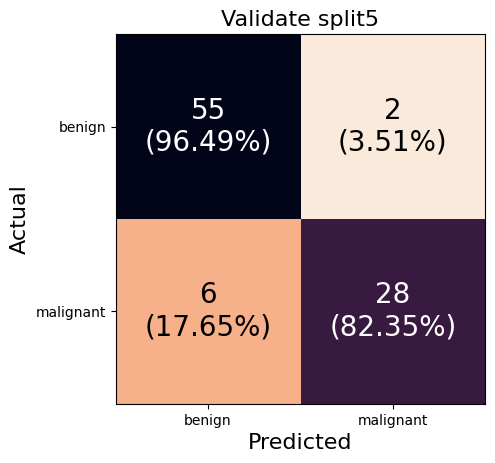

################# test set ##################
Best Threshold=1.000000
FPR: 0.1111
TPR: 0.8333
Confusion Matrix
----------------
[[64  8]
 [ 7 35]] 

----------------
split5
Sensitivity: 83.33%
Specificity: 88.89%
Accuracy: 86.84%
Precision: 81.40%
Sensitivity: 83.33%
Precision: 81.40%
F1: 82.35%


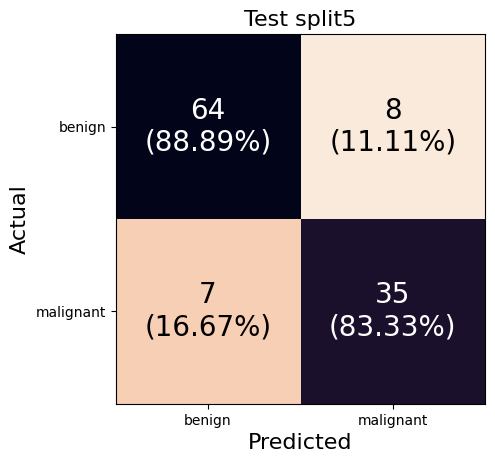

---------------------------------------
AUC validate: 89.42%
AUC test: 86.11%


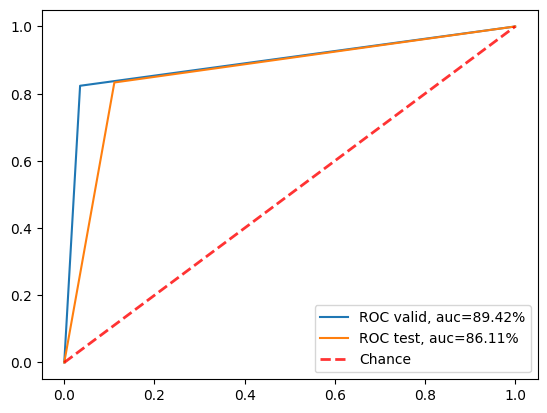

                   Variable  Importance
1                 area_mean    0.548161
12         smoothness_worst    0.138505
0              texture_mean    0.058178
7                   area_se    0.040035
2           smoothness_mean    0.039634
14           symmetry_worst    0.029316
13          concavity_worst    0.027060
3            concavity_mean    0.023980
15  fractal_dimension_worst    0.023008
8             smoothness_se    0.017544
10              symmetry_se    0.016154
9              concavity_se    0.013645
6                texture_se    0.013435
4             symmetry_mean    0.007675
5    fractal_dimension_mean    0.003487
11     fractal_dimension_se    0.000182


In [5550]:
param4_split5_cm_val, param4_split5_cm_test, param4_split5_AUC_val, param4_split5_AUC_test = evaluate(param,split)

# ----------------------- PARAMETER 5 -----------------------

## Param5 Split1

In [5565]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [5566]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2, 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_val, y_val)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [5601]:
dtc_train_param5(split)

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=0.500000
FPR: 0.0526
TPR: 0.9412
        id diagnosis  texture_mean  area_mean  smoothness_mean  \
8   923465         B         24.21      361.6          0.08192   
11  868871         B         13.39      384.8          0.11640   
23  871641         B         14.71      372.7          0.10060   
79  867739         M         21.91     1075.0          0.09430   
87  925622         M         30.62      716.9          0.10480   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
8          0.01548         0.1976                 0.06328       1.918   
11         0.04635         0.1771                 0.06072       1.343   
23         0.02363         0.1566                 0.06669       1.805   
79         0.11530         0.1692                 0.05727       1.202   
87         0.25500         0.2128                 0.07152       1.205   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimensio

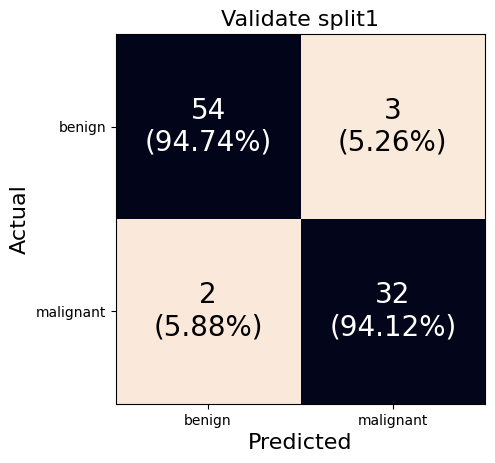

################# test set ##################
Best Threshold=0.500000
FPR: 0.0278
TPR: 0.7857
Confusion Matrix
----------------
[[70  2]
 [ 9 33]] 

----------------
split1
Sensitivity: 78.57%
Specificity: 97.22%
Accuracy: 90.35%
Precision: 94.29%
Sensitivity: 78.57%
Precision: 94.29%
F1: 85.71%


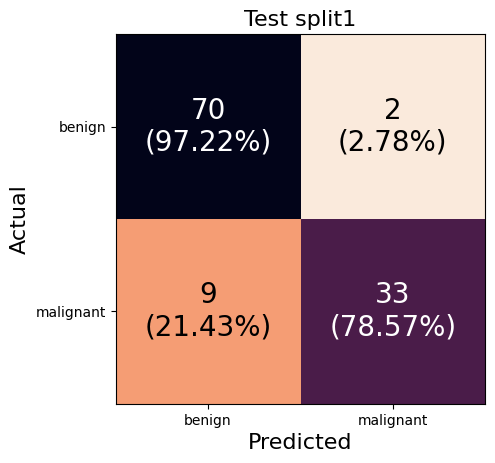

---------------------------------------
AUC validate: 94.27%
AUC test: 87.86%


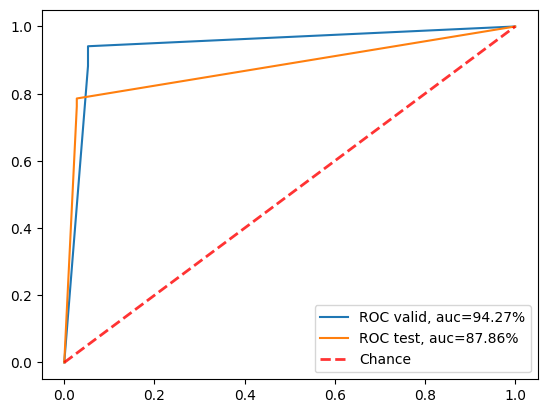

                   Variable  Importance
13          concavity_worst    0.407808
7                   area_se    0.181984
1                 area_mean    0.122967
2           smoothness_mean    0.085647
5    fractal_dimension_mean    0.062824
3            concavity_mean    0.046534
0              texture_mean    0.033663
10              symmetry_se    0.014348
9              concavity_se    0.014274
6                texture_se    0.014233
14           symmetry_worst    0.009042
8             smoothness_se    0.006678
4             symmetry_mean    0.000000
11     fractal_dimension_se    0.000000
12         smoothness_worst    0.000000
15  fractal_dimension_worst    0.000000


In [5602]:
param = 5
param5_split1_cm_val, param5_split1_cm_test, param5_split1_AUC_val, param5_split1_AUC_test = evaluate(param,split)

## Param5 Split2

In [5652]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [5653]:
dtc_train_param5(split)

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0702
TPR: 0.9706
         id diagnosis  texture_mean  area_mean  smoothness_mean  \
11   868871         B         13.39      384.8          0.11640   
19   909777         B         18.32      340.9          0.08142   
26   907409         B         14.98      333.6          0.09816   
48  9113846         B         29.97      465.4          0.07699   
87   925622         M         30.62      716.9          0.10480   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
11         0.04635         0.1771                 0.06072       1.343   
19         0.01993         0.2372                 0.05768       2.542   
26         0.06335         0.1925                 0.06915       1.127   
48         0.00000         0.1701                 0.05960       3.647   
87         0.25500         0.2128                 0.07152       1.205   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_di

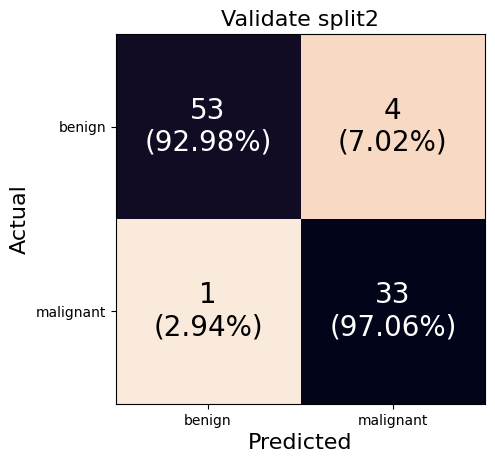

################# test set ##################
Best Threshold=1.000000
FPR: 0.1250
TPR: 0.8810
Confusion Matrix
----------------
[[63  9]
 [ 5 37]] 

----------------
split2
Sensitivity: 88.10%
Specificity: 87.50%
Accuracy: 87.72%
Precision: 80.43%
Sensitivity: 88.10%
Precision: 80.43%
F1: 84.09%


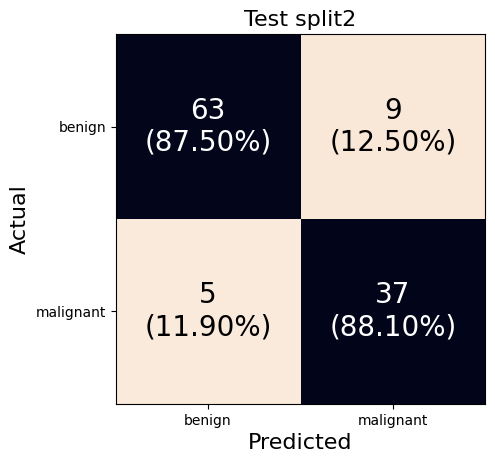

---------------------------------------
AUC validate: 95.02%
AUC test: 87.80%


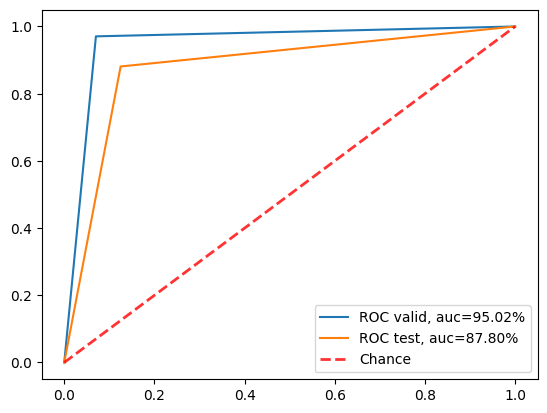

                   Variable  Importance
7                   area_se    0.522191
13          concavity_worst    0.228925
1                 area_mean    0.047891
0              texture_mean    0.039836
5    fractal_dimension_mean    0.035364
9              concavity_se    0.034290
6                texture_se    0.029537
15  fractal_dimension_worst    0.019558
3            concavity_mean    0.011751
8             smoothness_se    0.009357
11     fractal_dimension_se    0.008254
4             symmetry_mean    0.007479
14           symmetry_worst    0.005263
12         smoothness_worst    0.000304
2           smoothness_mean    0.000000
10              symmetry_se    0.000000


In [5654]:
param = 5
param5_split2_cm_val, param5_split2_cm_test, param5_split2_AUC_val, param5_split2_AUC_test = evaluate(param,split)

## Param5 Split3

In [5655]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [5720]:
dtc_train_param5(split)

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 0.9118
           id diagnosis  texture_mean  area_mean  smoothness_mean  \
9      917897         B         15.68      293.2          0.09492   
42    9110944         B         17.66      674.8          0.09179   
76  911296201         M         27.15      930.9          0.09898   
81     846381         M         23.95      782.7          0.08401   
87     925622         M         30.62      716.9          0.10480   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
9          0.02330         0.1387                 0.06891      1.2160   
42         0.04069         0.1893                 0.05886      0.6221   
76         0.10070         0.1793                 0.06281      1.1520   
81         0.09938         0.1847                 0.05338      1.0780   
87         0.25500         0.2128                 0.07152      1.2050   

    area_se  smoothness_se  concavity_se  symmetry_se

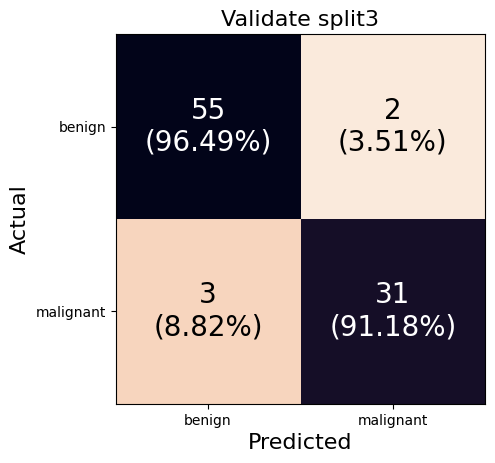

################# test set ##################
Best Threshold=1.000000
FPR: 0.0417
TPR: 0.8333
Confusion Matrix
----------------
[[69  3]
 [ 7 35]] 

----------------
split3
Sensitivity: 83.33%
Specificity: 95.83%
Accuracy: 91.23%
Precision: 92.11%
Sensitivity: 83.33%
Precision: 92.11%
F1: 87.50%


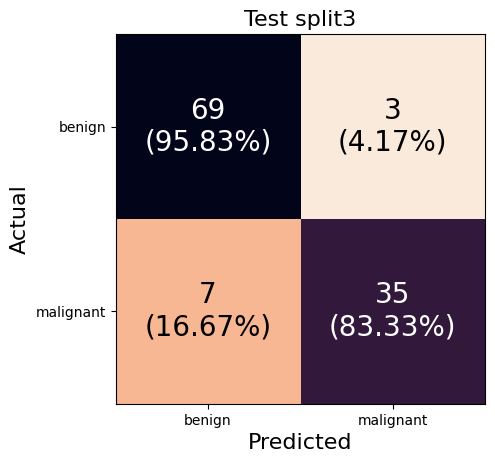

---------------------------------------
AUC validate: 93.83%
AUC test: 89.58%


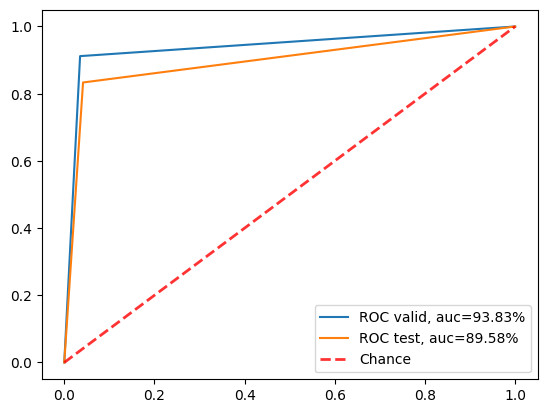

                   Variable  Importance
13          concavity_worst    0.263831
1                 area_mean    0.256839
9              concavity_se    0.185730
7                   area_se    0.119185
15  fractal_dimension_worst    0.034814
3            concavity_mean    0.030432
14           symmetry_worst    0.022046
12         smoothness_worst    0.017360
6                texture_se    0.016963
0              texture_mean    0.015897
11     fractal_dimension_se    0.015832
2           smoothness_mean    0.013536
8             smoothness_se    0.007535
4             symmetry_mean    0.000000
5    fractal_dimension_mean    0.000000
10              symmetry_se    0.000000


In [5721]:
param = 5
param5_split3_cm_val, param5_split3_cm_test, param5_split3_AUC_val, param5_split3_AUC_test = evaluate(param,split)

## Param5 Split4

In [5750]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [5751]:
dtc_train_param5(split)

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9706
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
19    909777         B         18.32      340.9          0.08142   
43  88518501         B         18.45      407.4          0.09345   
45   8711002         B         15.34      538.9          0.09384   
80    883263         M         21.46     1306.0          0.08355   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
19         0.01993         0.2372                 0.05768      2.5420   
43         0.02638         0.1834                 0.05934      0.8429   
45         0.09293         0.1822                 0.06207      0.7927   
80         0.09042         0.1467                 0.05177      1.0410   

    area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  \
19    13.12       0.010720       0.01993      0.01717              0.004492   
43    26.99       0.006380       0.01245  

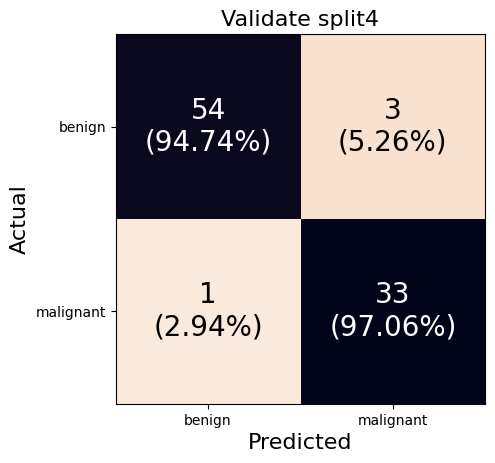

################# test set ##################
Best Threshold=1.000000
FPR: 0.1111
TPR: 0.8571
Confusion Matrix
----------------
[[64  8]
 [ 6 36]] 

----------------
split4
Sensitivity: 85.71%
Specificity: 88.89%
Accuracy: 87.72%
Precision: 81.82%
Sensitivity: 85.71%
Precision: 81.82%
F1: 83.72%


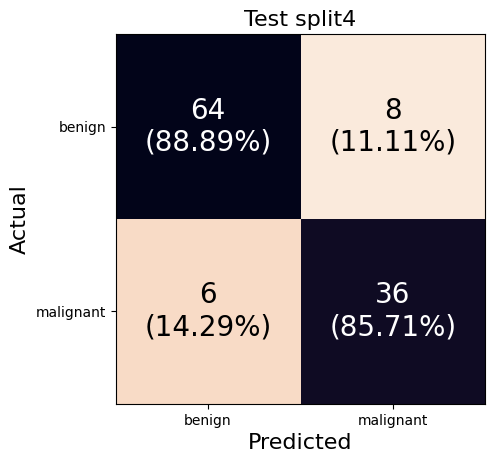

---------------------------------------
AUC validate: 95.90%
AUC test: 87.30%


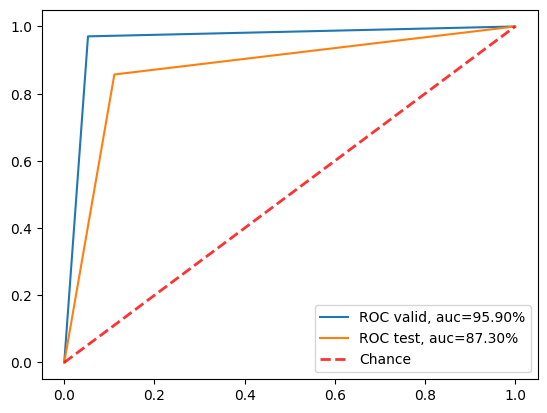

                   Variable  Importance
1                 area_mean    0.630808
13          concavity_worst    0.145201
0              texture_mean    0.070944
12         smoothness_worst    0.054425
7                   area_se    0.025487
5    fractal_dimension_mean    0.019139
4             symmetry_mean    0.017544
9              concavity_se    0.008373
6                texture_se    0.007519
2           smoothness_mean    0.006515
8             smoothness_se    0.005322
10              symmetry_se    0.004386
11     fractal_dimension_se    0.004339
3            concavity_mean    0.000000
14           symmetry_worst    0.000000
15  fractal_dimension_worst    0.000000


In [5752]:
param5_split4_cm_val, param5_split4_cm_test, param5_split4_AUC_val, param5_split4_AUC_test = evaluate(param,split)

## Param5 Split5

In [5914]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [5921]:
dtc_train_param5(split)

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


############## validate set ################
Best Threshold=1.000000
FPR: 0.0702
TPR: 0.8824
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
5      91505         B         16.32      476.3          0.11580   
14    863270         B         18.54      466.7          0.08477   
43  88518501         B         18.45      407.4          0.09345   
44    911366         B         18.18      408.8          0.11750   
57   8810528         B         18.94      428.0          0.08871   
61    922297         B         20.70      584.8          0.09578   
62    914580         B         17.31      480.1          0.08928   
79    867739         M         21.91     1075.0          0.09430   

    concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
5          0.05928         0.1943                 0.06612      1.0950   
14         0.02643         0.1602                 0.06066      0.8944   
43         0.02638         0.1834                 0.05934      0.8429   
44

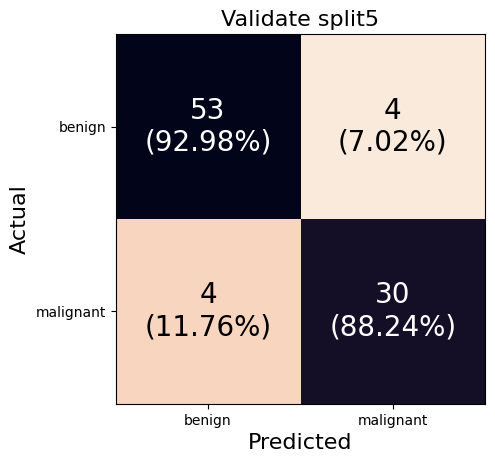

################# test set ##################
Best Threshold=1.000000
FPR: 0.0833
TPR: 0.9286
Confusion Matrix
----------------
[[66  6]
 [ 3 39]] 

----------------
split5
Sensitivity: 92.86%
Specificity: 91.67%
Accuracy: 92.11%
Precision: 86.67%
Sensitivity: 92.86%
Precision: 86.67%
F1: 89.66%


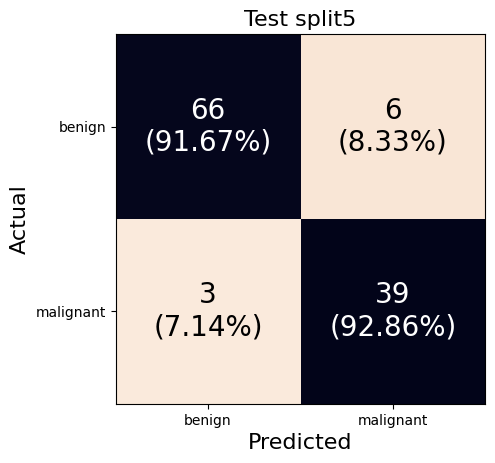

---------------------------------------
AUC validate: 90.61%
AUC test: 92.26%


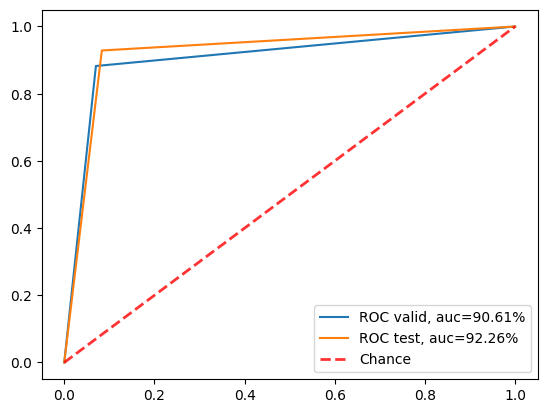

                   Variable  Importance
1                 area_mean    0.548161
12         smoothness_worst    0.138505
0              texture_mean    0.058178
7                   area_se    0.040035
2           smoothness_mean    0.039634
14           symmetry_worst    0.029316
13          concavity_worst    0.027060
3            concavity_mean    0.023980
15  fractal_dimension_worst    0.023008
8             smoothness_se    0.017544
10              symmetry_se    0.016154
9              concavity_se    0.013645
6                texture_se    0.013435
4             symmetry_mean    0.007675
5    fractal_dimension_mean    0.003487
11     fractal_dimension_se    0.000182


In [5922]:
param5_split5_cm_val, param5_split5_cm_test, param5_split5_AUC_val, param5_split5_AUC_test = evaluate(param,split)

# Overall

param1
split1
Sensitivity: 94.12%
Specificity: 96.49%
Accuracy: 95.60%
Precision: 94.12%
Sensitivity: 94.12%
Precision: 94.12%
F1: 94.12%

split2
Sensitivity: 100.00%
Specificity: 94.74%
Accuracy: 96.70%
Precision: 91.89%
Sensitivity: 100.00%
Precision: 91.89%
F1: 95.77%

split3
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

split4
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%

split5
Sensitivity: 100.00%
Specificity: 89.47%
Accuracy: 93.41%
Precision: 85.00%
Sensitivity: 100.00%
Precision: 85.00%
F1: 91.89%

overall
sensitivity: 97.65 ± 2.46%
specificity: 95.09 ± 3.80%
accuracy: 96.04 ± 2.00%
precision: 92.54 ± 5.39%
f1_score: 94.92 ± 2.44%


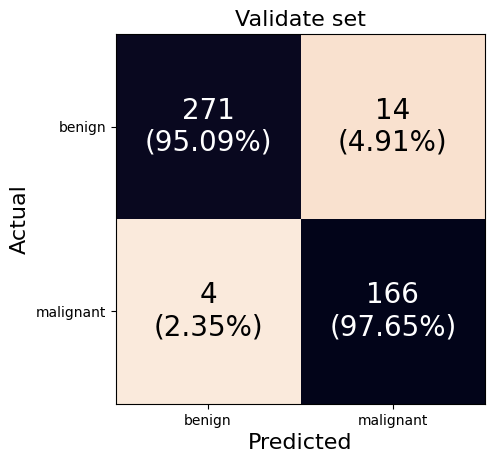

AUC1: 9633.64 ± 155.65%


In [5923]:
print("param1")
plot(param1_split1_cm_val , param1_split2_cm_val , param1_split3_cm_val , param1_split4_cm_val , param1_split5_cm_val)
Mean_SD("AUC1",param1_split1_AUC_val*100, param1_split2_AUC_val*100, param1_split3_AUC_val*100, param1_split4_AUC_val*100, param1_split5_AUC_val*100)

param2
split1
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

split2
Sensitivity: 94.12%
Specificity: 98.25%
Accuracy: 96.70%
Precision: 96.97%
Sensitivity: 94.12%
Precision: 96.97%
F1: 95.52%

split3
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

split4
Sensitivity: 100.00%
Specificity: 92.98%
Accuracy: 95.60%
Precision: 89.47%
Sensitivity: 100.00%
Precision: 89.47%
F1: 94.44%

split5
Sensitivity: 91.18%
Specificity: 94.74%
Accuracy: 93.41%
Precision: 91.18%
Sensitivity: 91.18%
Precision: 91.18%
F1: 91.18%

overall
sensitivity: 95.88 ± 3.35%
specificity: 95.09 ± 1.92%
accuracy: 95.38 ± 1.20%
precision: 92.19 ± 2.82%
f1_score: 93.94 ± 1.63%


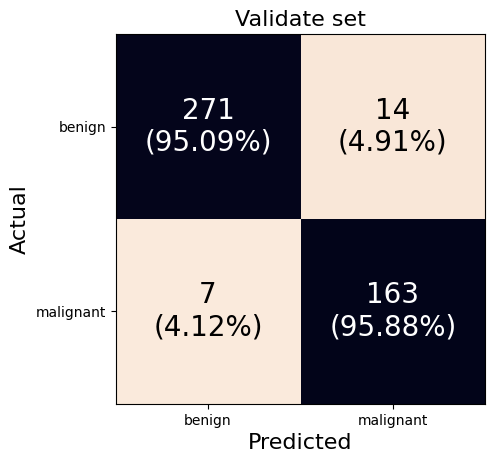

AUC1: 9548.50 ± 143.45%


In [5924]:
print("param2")
plot(param2_split1_cm_val , param2_split2_cm_val , param2_split3_cm_val , param2_split4_cm_val , param2_split5_cm_val)
Mean_SD("AUC1",param2_split1_AUC_val*100, param2_split2_AUC_val*100, param2_split3_AUC_val*100, param2_split4_AUC_val*100, param2_split5_AUC_val*100)

param3
split1
Sensitivity: 91.18%
Specificity: 94.74%
Accuracy: 93.41%
Precision: 91.18%
Sensitivity: 91.18%
Precision: 91.18%
F1: 91.18%

split2
Sensitivity: 100.00%
Specificity: 94.74%
Accuracy: 96.70%
Precision: 91.89%
Sensitivity: 100.00%
Precision: 91.89%
F1: 95.77%

split3
Sensitivity: 94.12%
Specificity: 98.25%
Accuracy: 96.70%
Precision: 96.97%
Sensitivity: 94.12%
Precision: 96.97%
F1: 95.52%

split4
Sensitivity: 97.06%
Specificity: 92.98%
Accuracy: 94.51%
Precision: 89.19%
Sensitivity: 97.06%
Precision: 89.19%
F1: 92.96%

split5
Sensitivity: 88.24%
Specificity: 92.98%
Accuracy: 91.21%
Precision: 88.24%
Sensitivity: 88.24%
Precision: 88.24%
F1: 88.24%

overall
sensitivity: 94.12 ± 4.65%
specificity: 94.74 ± 2.15%
accuracy: 94.51 ± 2.33%
precision: 91.49 ± 3.40%
f1_score: 92.73 ± 3.15%


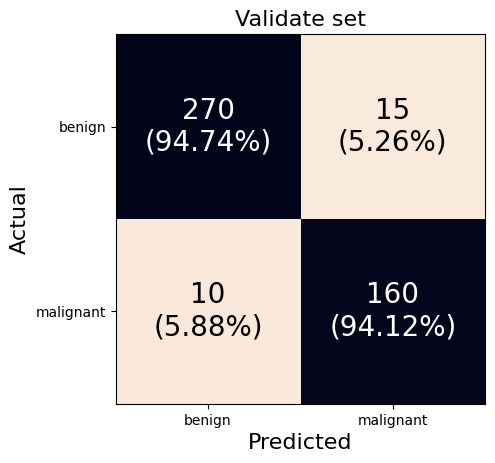

AUC1: 9519.09 ± 168.28%


In [5925]:
print("param3")
plot(param3_split1_cm_val , param3_split2_cm_val , param3_split3_cm_val , param3_split4_cm_val , param5_split5_cm_val)
Mean_SD("AUC1",param3_split1_AUC_val*100, param3_split2_AUC_val*100, param3_split3_AUC_val*100, param3_split4_AUC_val*100, param3_split5_AUC_val*100)

param4
split1
Sensitivity: 91.18%
Specificity: 94.74%
Accuracy: 93.41%
Precision: 91.18%
Sensitivity: 91.18%
Precision: 91.18%
F1: 91.18%

split2
Sensitivity: 85.29%
Specificity: 92.98%
Accuracy: 90.11%
Precision: 87.88%
Sensitivity: 85.29%
Precision: 87.88%
F1: 86.57%

split3
Sensitivity: 88.24%
Specificity: 94.74%
Accuracy: 92.31%
Precision: 90.91%
Sensitivity: 88.24%
Precision: 90.91%
F1: 89.55%

split4
Sensitivity: 82.35%
Specificity: 91.23%
Accuracy: 87.91%
Precision: 84.85%
Sensitivity: 82.35%
Precision: 84.85%
F1: 83.58%

split5
Sensitivity: 82.35%
Specificity: 96.49%
Accuracy: 91.21%
Precision: 93.33%
Sensitivity: 82.35%
Precision: 93.33%
F1: 87.50%

overall
sensitivity: 85.88 ± 3.83%
specificity: 94.04 ± 2.00%
accuracy: 90.99 ± 2.11%
precision: 89.63 ± 3.30%
f1_score: 87.68 ± 2.91%


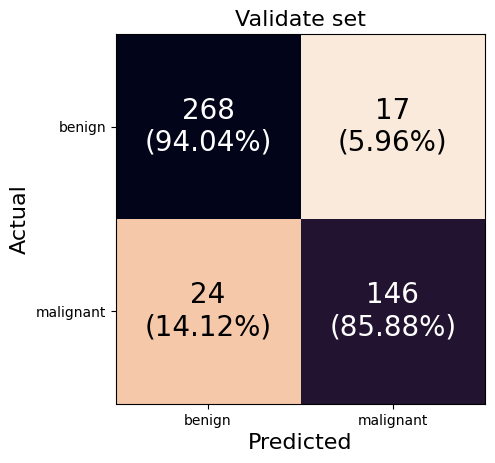

AUC1: 8995.87 ± 236.22%


In [5926]:
print("param4")
plot(param4_split1_cm_val , param4_split2_cm_val , param4_split3_cm_val , param4_split4_cm_val , param4_split5_cm_val)
Mean_SD("AUC1",param4_split1_AUC_val*100, param4_split2_AUC_val*100, param4_split3_AUC_val*100, param4_split4_AUC_val*100, param4_split5_AUC_val*100)

param5
split1
Sensitivity: 94.12%
Specificity: 94.74%
Accuracy: 94.51%
Precision: 91.43%
Sensitivity: 94.12%
Precision: 91.43%
F1: 92.75%

split2
Sensitivity: 97.06%
Specificity: 92.98%
Accuracy: 94.51%
Precision: 89.19%
Sensitivity: 97.06%
Precision: 89.19%
F1: 92.96%

split3
Sensitivity: 91.18%
Specificity: 96.49%
Accuracy: 94.51%
Precision: 93.94%
Sensitivity: 91.18%
Precision: 93.94%
F1: 92.54%

split4
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

split5
Sensitivity: 88.24%
Specificity: 92.98%
Accuracy: 91.21%
Precision: 88.24%
Sensitivity: 88.24%
Precision: 88.24%
F1: 88.24%

overall
sensitivity: 93.53 ± 3.83%
specificity: 94.39 ± 1.47%
accuracy: 94.07 ± 1.67%
precision: 90.89 ± 2.24%
f1_score: 92.15 ± 2.29%


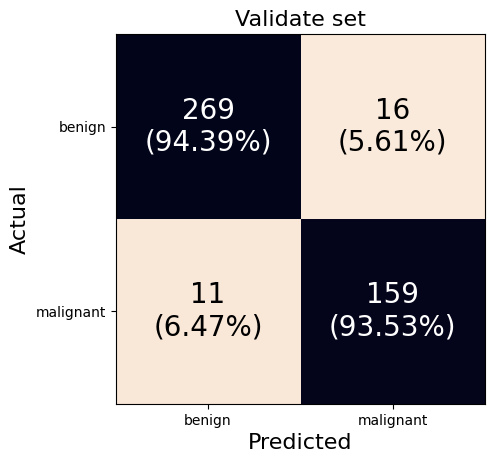

AUC1: 9392.67 ± 201.36%


In [5927]:
print("param5")
plot(param5_split1_cm_val , param5_split2_cm_val , param5_split3_cm_val , param5_split4_cm_val , param5_split5_cm_val)
Mean_SD("AUC1",param5_split1_AUC_val*100, param5_split2_AUC_val*100, param5_split3_AUC_val*100, param5_split4_AUC_val*100, param5_split5_AUC_val*100)

param1
split1
Sensitivity: 94.12%
Specificity: 96.49%
Accuracy: 95.60%
Precision: 94.12%
Sensitivity: 94.12%
Precision: 94.12%
F1: 94.12%

split2
Sensitivity: 100.00%
Specificity: 94.74%
Accuracy: 96.70%
Precision: 91.89%
Sensitivity: 100.00%
Precision: 91.89%
F1: 95.77%

split3
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

split4
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%

split5
Sensitivity: 100.00%
Specificity: 89.47%
Accuracy: 93.41%
Precision: 85.00%
Sensitivity: 100.00%
Precision: 85.00%
F1: 91.89%

overall
sensitivity: 97.65 ± 2.46%
specificity: 95.09 ± 3.80%
accuracy: 96.04 ± 2.00%
precision: 92.54 ± 5.39%
f1_score: 94.92 ± 2.44%


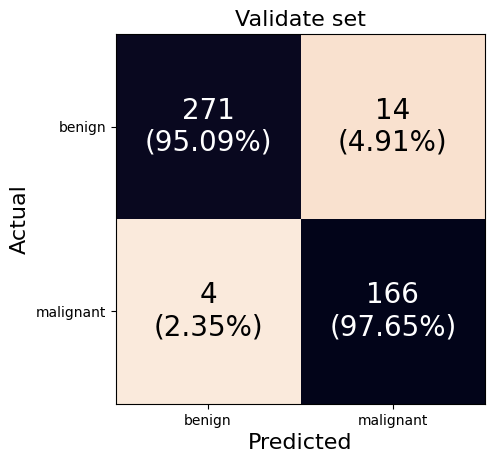

AUC1: 9633.64 ± 155.65%
../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=0.500000
FPR: 0.0351
TPR: 0.9412
../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0526
TPR: 1.0000
../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9706
../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//te

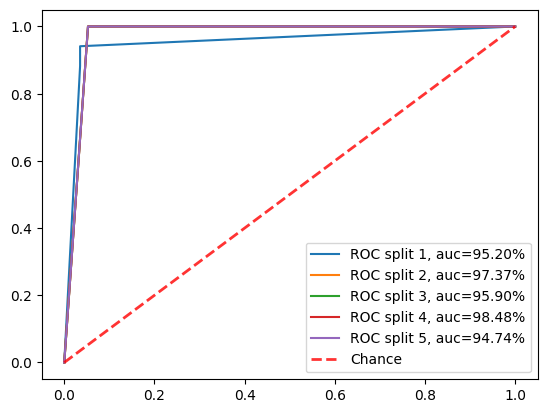

In [5937]:
print("param1")
plot(param1_split1_cm_val , param1_split2_cm_val , param1_split3_cm_val , param1_split4_cm_val , param1_split5_cm_val)
Mean_SD("AUC1",param1_split1_AUC_val*100, param1_split2_AUC_val*100, param1_split3_AUC_val*100, param1_split4_AUC_val*100, param1_split5_AUC_val*100)
ROC_split(1)

param2
split1
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

split2
Sensitivity: 94.12%
Specificity: 98.25%
Accuracy: 96.70%
Precision: 96.97%
Sensitivity: 94.12%
Precision: 96.97%
F1: 95.52%

split3
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

split4
Sensitivity: 100.00%
Specificity: 92.98%
Accuracy: 95.60%
Precision: 89.47%
Sensitivity: 100.00%
Precision: 89.47%
F1: 94.44%

split5
Sensitivity: 91.18%
Specificity: 94.74%
Accuracy: 93.41%
Precision: 91.18%
Sensitivity: 91.18%
Precision: 91.18%
F1: 91.18%

overall
sensitivity: 95.88 ± 3.35%
specificity: 95.09 ± 1.92%
accuracy: 95.38 ± 1.20%
precision: 92.19 ± 2.82%
f1_score: 93.94 ± 1.63%


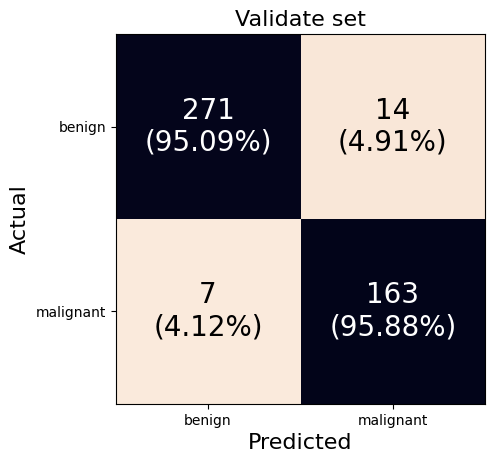

AUC2: 9548.50 ± 143.45%
../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.1228
TPR: 0.8235
../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0175
TPR: 0.9412
../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9706
../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//te

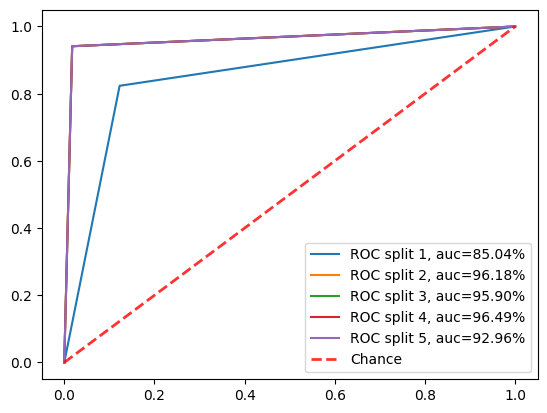

In [5931]:
print("param2")
plot(param2_split1_cm_val , param2_split2_cm_val , param2_split3_cm_val , param2_split4_cm_val , param2_split5_cm_val)
Mean_SD("AUC2",param2_split1_AUC_val*100, param2_split2_AUC_val*100, param2_split3_AUC_val*100, param2_split4_AUC_val*100, param2_split5_AUC_val*100)
ROC_split(2)

param3
split1
Sensitivity: 91.18%
Specificity: 94.74%
Accuracy: 93.41%
Precision: 91.18%
Sensitivity: 91.18%
Precision: 91.18%
F1: 91.18%

split2
Sensitivity: 100.00%
Specificity: 94.74%
Accuracy: 96.70%
Precision: 91.89%
Sensitivity: 100.00%
Precision: 91.89%
F1: 95.77%

split3
Sensitivity: 94.12%
Specificity: 98.25%
Accuracy: 96.70%
Precision: 96.97%
Sensitivity: 94.12%
Precision: 96.97%
F1: 95.52%

split4
Sensitivity: 97.06%
Specificity: 92.98%
Accuracy: 94.51%
Precision: 89.19%
Sensitivity: 97.06%
Precision: 89.19%
F1: 92.96%

split5
Sensitivity: 94.12%
Specificity: 94.74%
Accuracy: 94.51%
Precision: 91.43%
Sensitivity: 94.12%
Precision: 91.43%
F1: 92.75%

overall
sensitivity: 95.29 ± 3.35%
specificity: 95.09 ± 1.92%
accuracy: 95.16 ± 1.47%
precision: 92.13 ± 2.90%
f1_score: 93.64 ± 1.96%


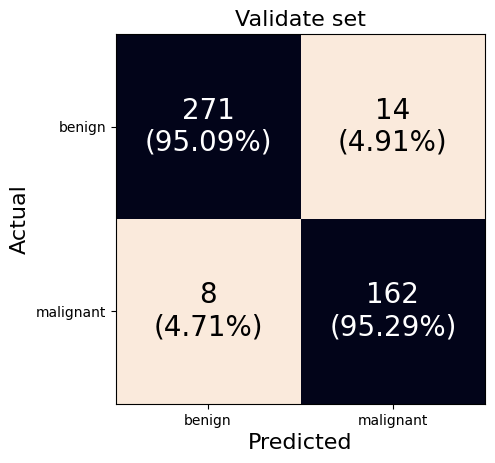

AUC3: 9519.09 ± 168.28%
../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9118
../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0526
TPR: 1.0000
../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0175
TPR: 0.9412
../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//te

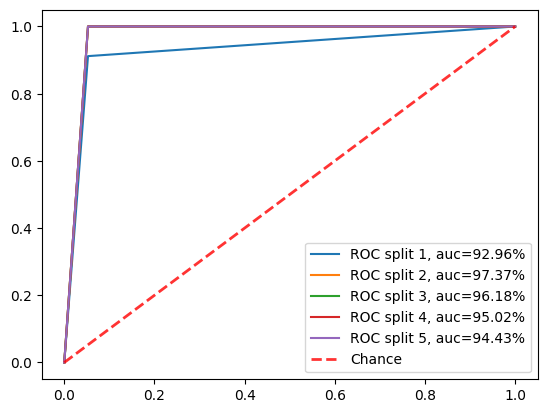

In [5932]:
print("param3")
plot(param3_split1_cm_val , param3_split2_cm_val , param3_split3_cm_val , param3_split4_cm_val , param3_split5_cm_val)
Mean_SD("AUC3",param3_split1_AUC_val*100, param3_split2_AUC_val*100, param3_split3_AUC_val*100, param3_split4_AUC_val*100, param3_split5_AUC_val*100)
ROC_split(3)

param4
split1
Sensitivity: 91.18%
Specificity: 94.74%
Accuracy: 93.41%
Precision: 91.18%
Sensitivity: 91.18%
Precision: 91.18%
F1: 91.18%

split2
Sensitivity: 85.29%
Specificity: 92.98%
Accuracy: 90.11%
Precision: 87.88%
Sensitivity: 85.29%
Precision: 87.88%
F1: 86.57%

split3
Sensitivity: 88.24%
Specificity: 94.74%
Accuracy: 92.31%
Precision: 90.91%
Sensitivity: 88.24%
Precision: 90.91%
F1: 89.55%

split4
Sensitivity: 82.35%
Specificity: 91.23%
Accuracy: 87.91%
Precision: 84.85%
Sensitivity: 82.35%
Precision: 84.85%
F1: 83.58%

split5
Sensitivity: 82.35%
Specificity: 96.49%
Accuracy: 91.21%
Precision: 93.33%
Sensitivity: 82.35%
Precision: 93.33%
F1: 87.50%

overall
sensitivity: 85.88 ± 3.83%
specificity: 94.04 ± 2.00%
accuracy: 90.99 ± 2.11%
precision: 89.63 ± 3.30%
f1_score: 87.68 ± 2.91%


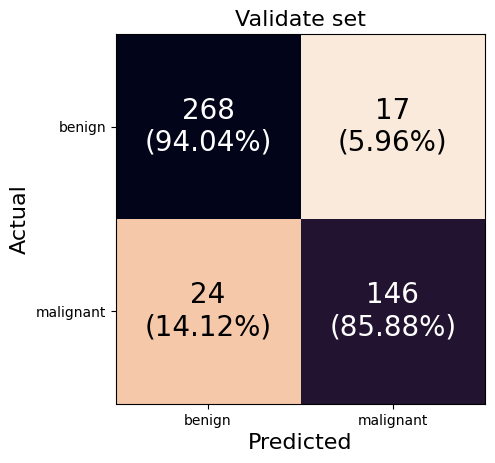

AUC4: 8995.87 ± 236.22%
../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9118
../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0702
TPR: 0.8529
../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.8824
../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//te

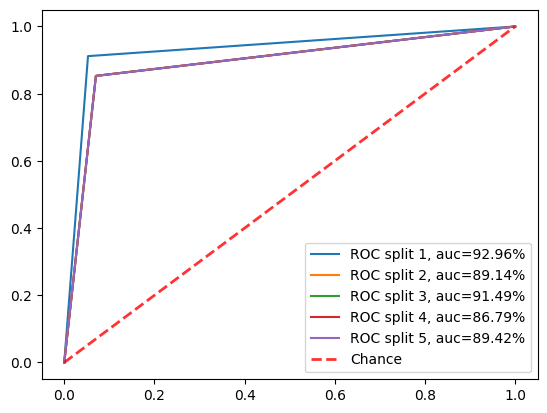

In [5933]:
print("param4")
plot(param4_split1_cm_val , param4_split2_cm_val , param4_split3_cm_val , param4_split4_cm_val , param4_split5_cm_val)
Mean_SD("AUC4",param4_split1_AUC_val*100, param4_split2_AUC_val*100, param4_split3_AUC_val*100, param4_split4_AUC_val*100, param4_split5_AUC_val*100)
ROC_split(4)

param5
split1
Sensitivity: 94.12%
Specificity: 94.74%
Accuracy: 94.51%
Precision: 91.43%
Sensitivity: 94.12%
Precision: 91.43%
F1: 92.75%

split2
Sensitivity: 97.06%
Specificity: 92.98%
Accuracy: 94.51%
Precision: 89.19%
Sensitivity: 97.06%
Precision: 89.19%
F1: 92.96%

split3
Sensitivity: 91.18%
Specificity: 96.49%
Accuracy: 94.51%
Precision: 93.94%
Sensitivity: 91.18%
Precision: 93.94%
F1: 92.54%

split4
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

split5
Sensitivity: 88.24%
Specificity: 92.98%
Accuracy: 91.21%
Precision: 88.24%
Sensitivity: 88.24%
Precision: 88.24%
F1: 88.24%

overall
sensitivity: 93.53 ± 3.83%
specificity: 94.39 ± 1.47%
accuracy: 94.07 ± 1.67%
precision: 90.89 ± 2.24%
f1_score: 92.15 ± 2.29%


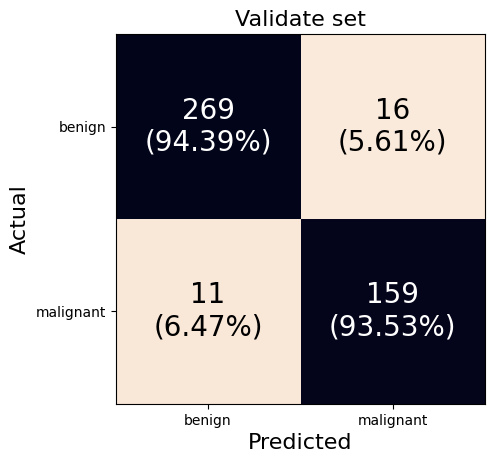

AUC5: 9392.67 ± 201.36%
../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=0.500000
FPR: 0.0526
TPR: 0.9412
../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0702
TPR: 0.9706
../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0351
TPR: 0.9118
../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//te

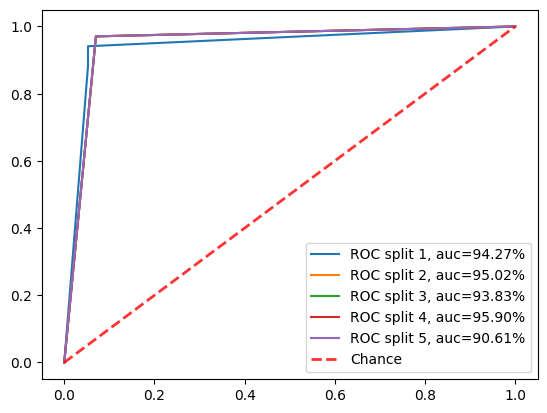

In [5934]:
print("param5")
plot(param5_split1_cm_val , param5_split2_cm_val , param5_split3_cm_val , param5_split4_cm_val , param5_split5_cm_val)
Mean_SD("AUC5",param5_split1_AUC_val*100, param5_split2_AUC_val*100, param5_split3_AUC_val*100, param5_split4_AUC_val*100, param5_split5_AUC_val*100)
ROC_split(5)